**ggplot used for visulization of different continous and categorical variables by drawing scatter plot, histogram, stacked bar graph, density plot, box plot and heat maps.**

**Unsupervised learning like kmeans, hierarchical clustering with the addition of pca and scaling concept were applied on the data.**

In [133]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")

# Any results you write to the current directory are saved as output.

In [134]:
pokemon <- read_csv("../input/Pokemon.csv")
str(pokemon)

Parsed with column specification:
cols(
  `#` = col_double(),
  Name = col_character(),
  `Type 1` = col_character(),
  `Type 2` = col_character(),
  Total = col_double(),
  HP = col_double(),
  Attack = col_double(),
  Defense = col_double(),
  `Sp. Atk` = col_double(),
  `Sp. Def` = col_double(),
  Speed = col_double(),
  Generation = col_double(),
  Legendary = col_character()
)


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	800 obs. of  13 variables:
 $ #         : num  1 2 3 3 4 5 6 6 6 7 ...
 $ Name      : chr  "Bulbasaur" "Ivysaur" "Venusaur" "VenusaurMega Venusaur" ...
 $ Type 1    : chr  "Grass" "Grass" "Grass" "Grass" ...
 $ Type 2    : chr  "Poison" "Poison" "Poison" "Poison" ...
 $ Total     : num  318 405 525 625 309 405 534 634 634 314 ...
 $ HP        : num  45 60 80 80 39 58 78 78 78 44 ...
 $ Attack    : num  49 62 82 100 52 64 84 130 104 48 ...
 $ Defense   : num  49 63 83 123 43 58 78 111 78 65 ...
 $ Sp. Atk   : num  65 80 100 122 60 80 109 130 159 50 ...
 $ Sp. Def   : num  65 80 100 120 50 65 85 85 115 64 ...
 $ Speed     : num  45 60 80 80 65 80 100 100 100 43 ...
 $ Generation: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Legendary : chr  "False" "False" "False" "False" ...
 - attr(*, "spec")=
  .. cols(
  ..   `#` = col_double(),
  ..   Name = col_character(),
  ..   `Type 1` = col_character(),
  ..   `Type 2` = col_character(),
  ..   Total = col_double()

In [135]:

colnames(pokemon) <- c('number', 'name', 'type1', 'type2', 'total', 'hp', 'attack', 'defense','special_attack', 'special_defense', 'speed', 'generation', 'legendary')
head(pokemon)

number name                  type1 type2  total hp attack defense
1 1      Bulbasaur             Grass Poison 318   45  49     49    
2 2      Ivysaur               Grass Poison 405   60  62     63    
3 3      Venusaur              Grass Poison 525   80  82     83    
4 3      VenusaurMega Venusaur Grass Poison 625   80 100    123    
5 4      Charmander            Fire  NA     309   39  52     43    
6 5      Charmeleon            Fire  NA     405   58  64     58    
  special_attack special_defense speed generation legendary
1  65             65             45    1          False    
2  80             80             60    1          False    
3 100            100             80    1          False    
4 122            120             80    1          False    
5  60             50             65    1          False    
6  80             65             80    1          False

In [136]:
categorical <- c('type1', 'type2', 'legendary', 'generation')
numerical <- c('total', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed')

In [137]:
unique(pokemon$type1)
unique(pokemon$type2)
unique(pokemon$legendary)
unique(pokemon$generation)

[1] "Grass"    "Fire"     "Water"    "Bug"      "Normal"   "Poison"  
 [7] "Electric" "Ground"   "Fairy"    "Fighting" "Psychic"  "Rock"    
[13] "Ghost"    "Ice"      "Dragon"   "Dark"     "Steel"    "Flying"

[1] "Poison"   NA         "Flying"   "Dragon"   "Ground"   "Fairy"   
 [7] "Grass"    "Fighting" "Psychic"  "Steel"    "Ice"      "Rock"    
[13] "Dark"     "Water"    "Electric" "Fire"     "Ghost"    "Bug"     
[19] "Normal"

[1] "False" "True"

[1] 1 2 3 4 5 6

In [138]:
pokemon$generation_cat <- NA
pokemon$generation_cat[pokemon$generation == 1]= 'a'
pokemon$generation_cat[pokemon$generation == 2]= 'b'
pokemon$generation_cat[pokemon$generation == 3]= 'c' 
pokemon$generation_cat[pokemon$generation == 4]= 'd' 
pokemon$generation_cat[pokemon$generation == 5]= 'e' 
pokemon$generation_cat[pokemon$generation == 6]= 'f' 

**I used corrplot to understand the correlation between all the numerical variable**

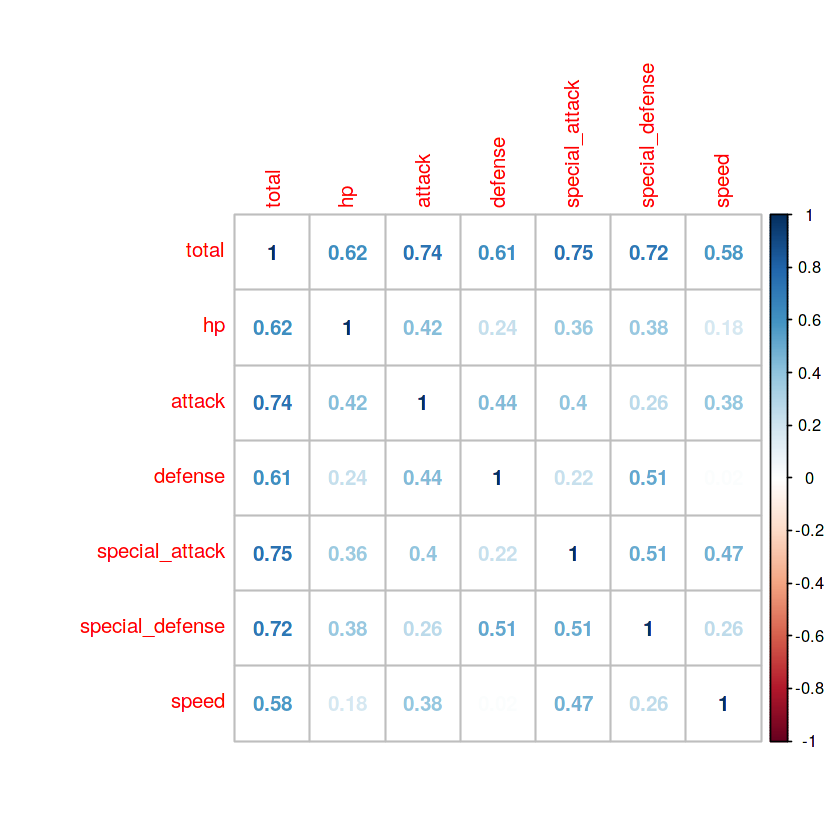

In [139]:
library(corrplot)
corrplot(cor(pokemon[numerical]), method = "number")

** Here correlation decreases as the darkness of the color decreases.**
* Seems like all the attributes here are highly correlated with the 'total' variable.
* Speed and defense is no way corelated with each other.

**Visualizations**

**> *Scatterplot***

> Attack vs defense

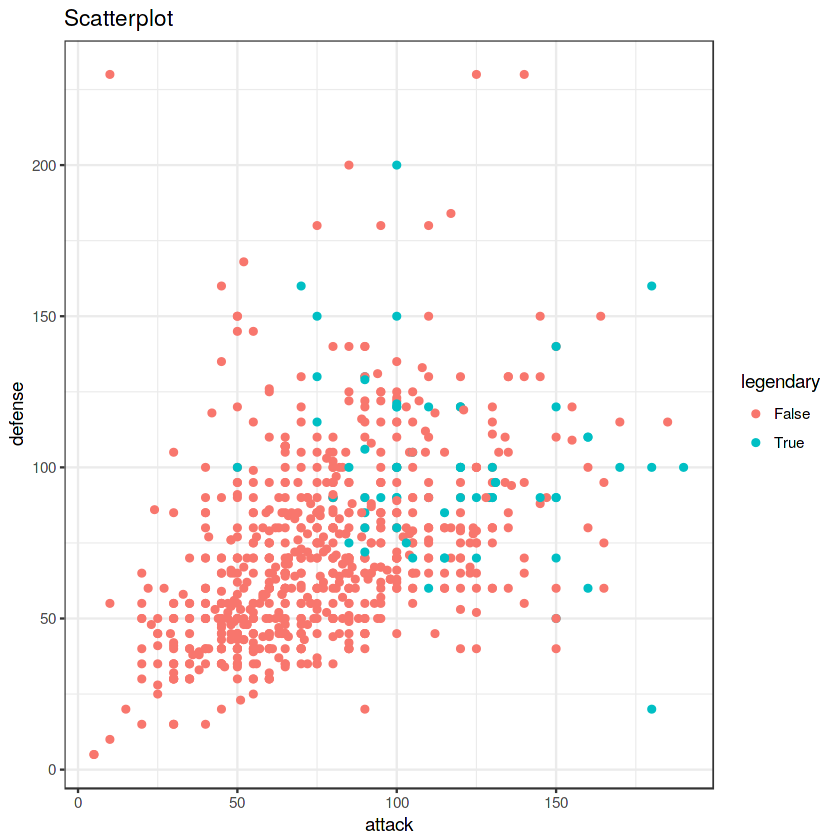

In [140]:
ggplot(pokemon, aes(attack, defense)) + geom_point(aes(color = legendary)) +
                theme_bw() + labs(title="Scatterplot") 

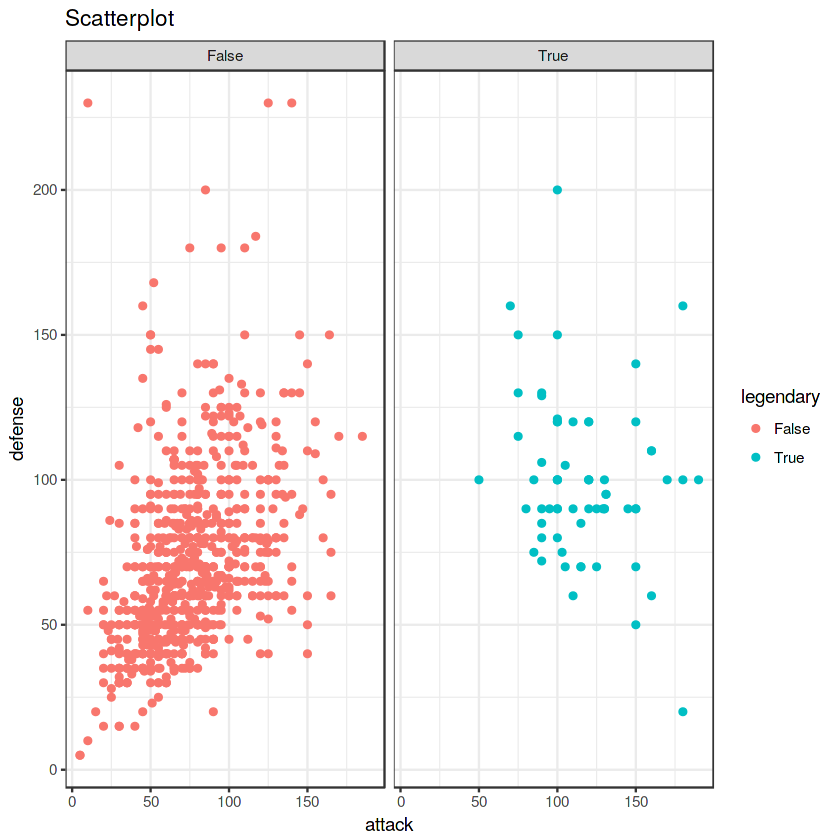

In [141]:
ggplot(pokemon, aes(attack, defense)) + geom_point(aes(color = legendary)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ legendary)

**Most of the legendary pokemons have more attack and defense against the non-legendary pokemons**

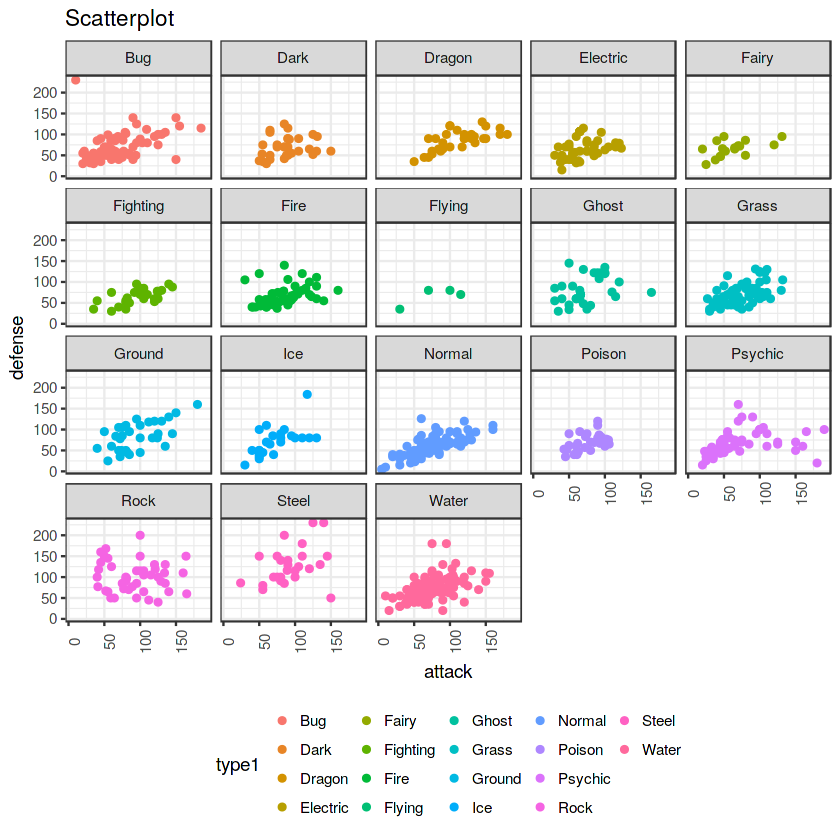

In [142]:
ggplot(pokemon, aes(attack, defense)) + geom_point(aes(color = type1)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type1) + theme(legend.position="bottom",axis.text.x = element_text(angle=90))

**Above figure depicts how well we can analyze the defense and attack of our pokemon based on the type1**

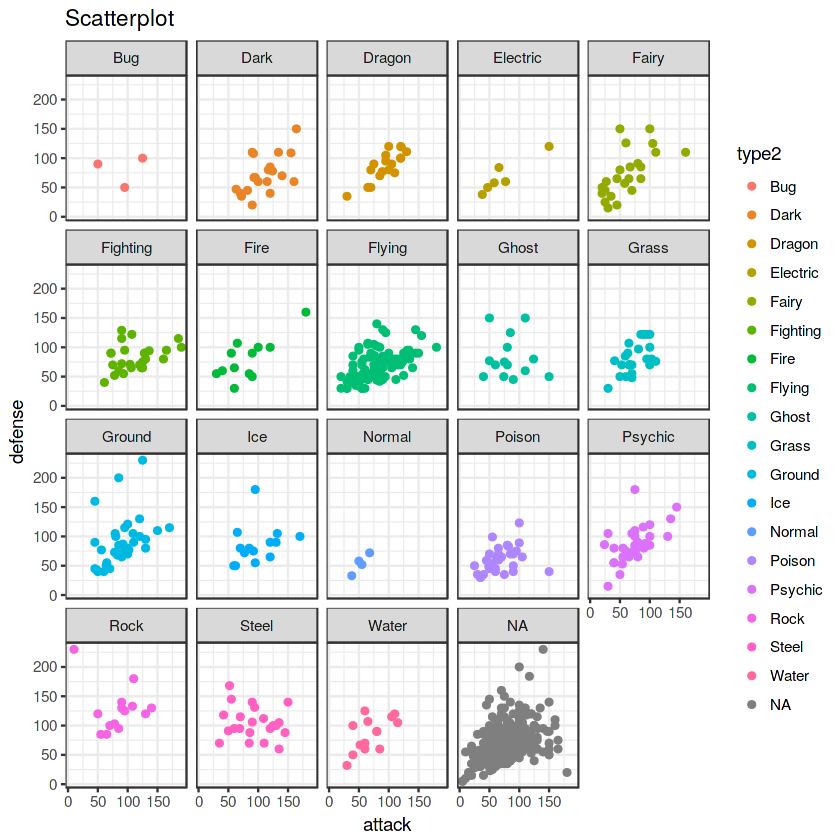

In [143]:
ggplot(pokemon, aes(attack, defense)) + geom_point(aes(color = type2)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type2)

**Above figure depicts how well we can analyze the defense and attack of our pokemon based on the type2**

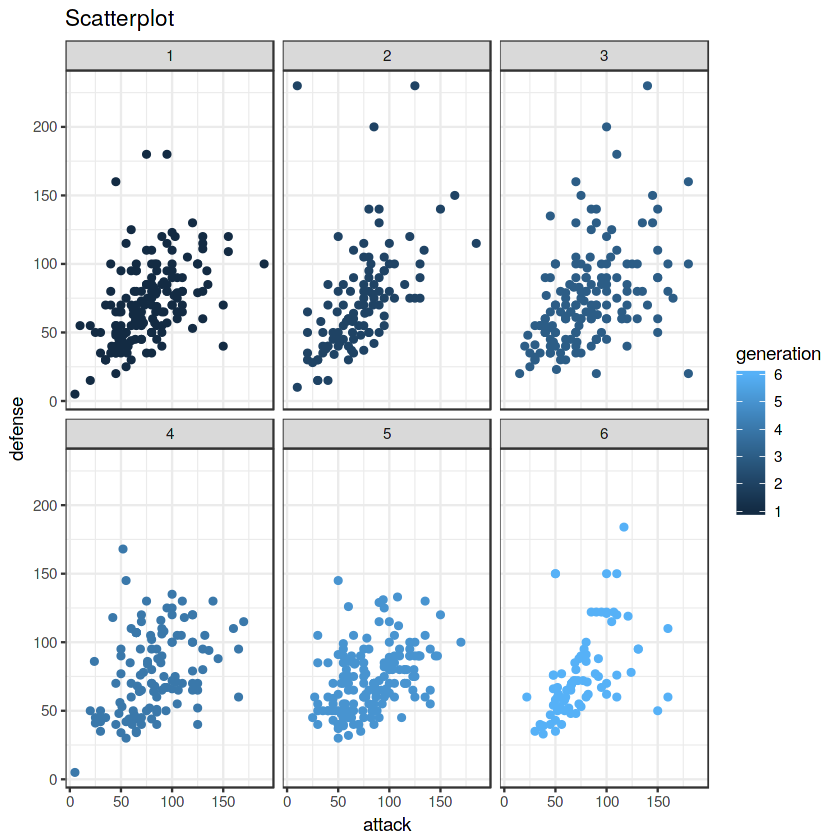

In [144]:

ggplot(pokemon, aes(attack, defense)) + geom_point(aes(color = generation)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ generation)

**Seems like attack-defense for each generation seems same**

> Special attack vs special defense

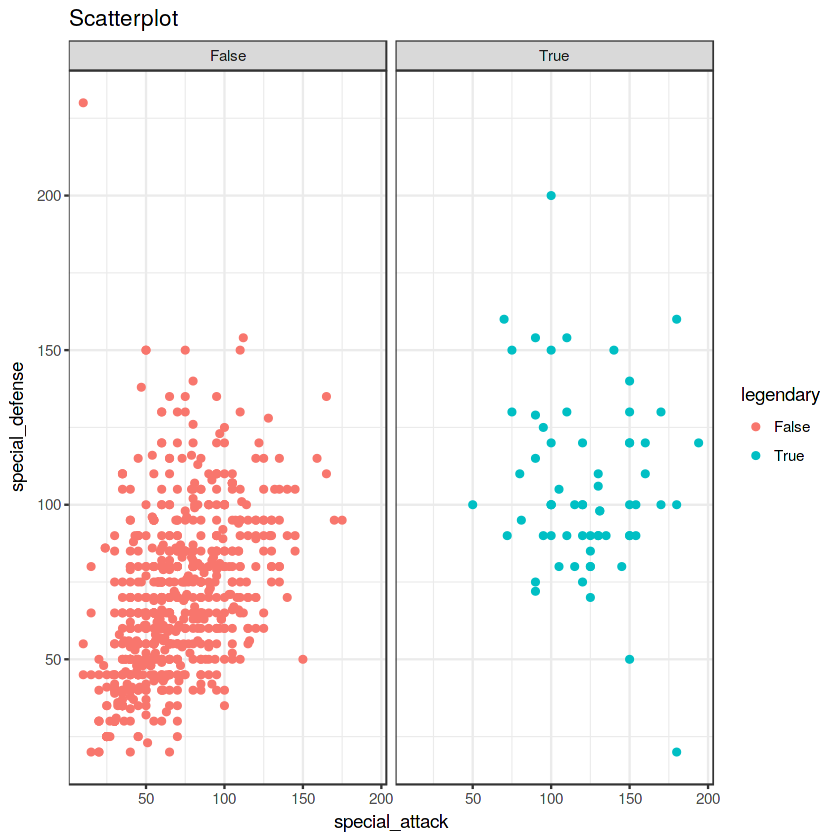

In [145]:
ggplot(pokemon, aes(special_attack, special_defense)) + geom_point(aes(color = legendary)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ legendary)

**Legendary pokemons have more special attack/ special defense than non-legendary pokemons.**
*Following the trend of attack/ defense *

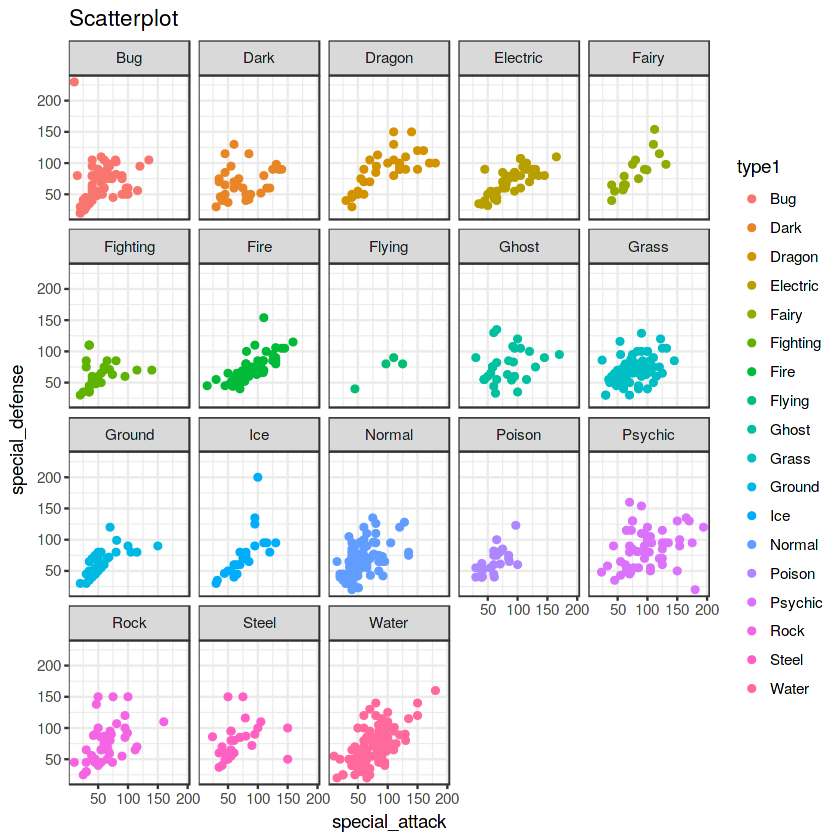

In [146]:
ggplot(pokemon, aes(special_attack, special_defense)) + geom_point(aes(color = type1)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type1)

**Above figure depicts how well we can analyze the special defense and special attack of our pokemon based on the type1**

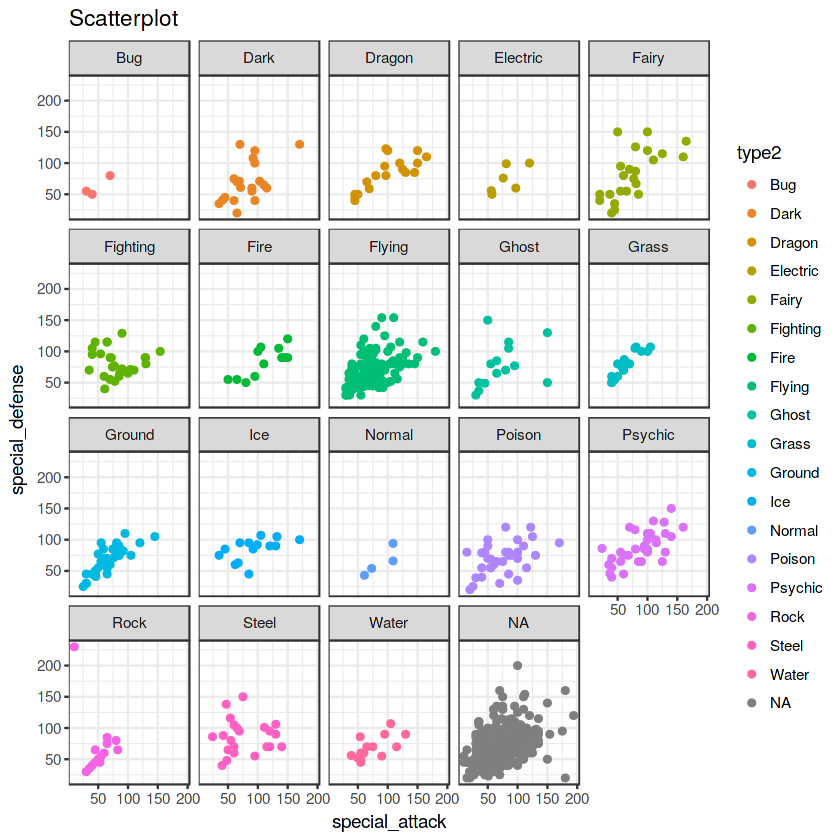

In [147]:
ggplot(pokemon, aes(special_attack, special_defense)) + geom_point(aes(color = type2)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type2)

**Above figure depicts how well we can analyze the special defense and special attack of our pokemon based on the type2**

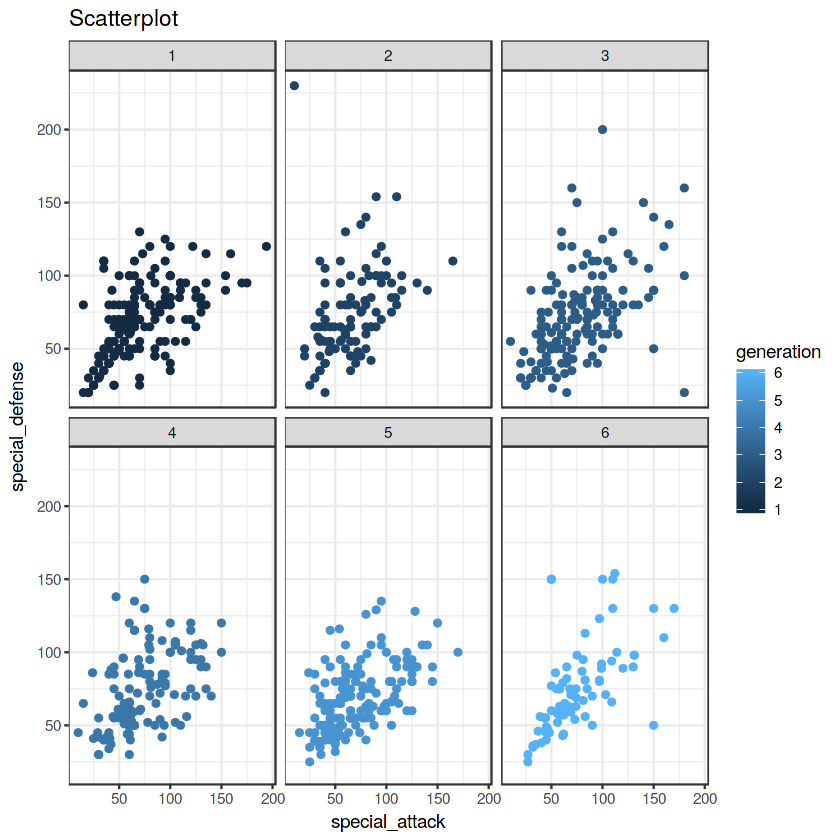

In [148]:
ggplot(pokemon, aes(special_attack, special_defense)) + geom_point(aes(color = generation)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ generation)

**Seems like special attack-special defense for each generation seems same**

> hp vs speed

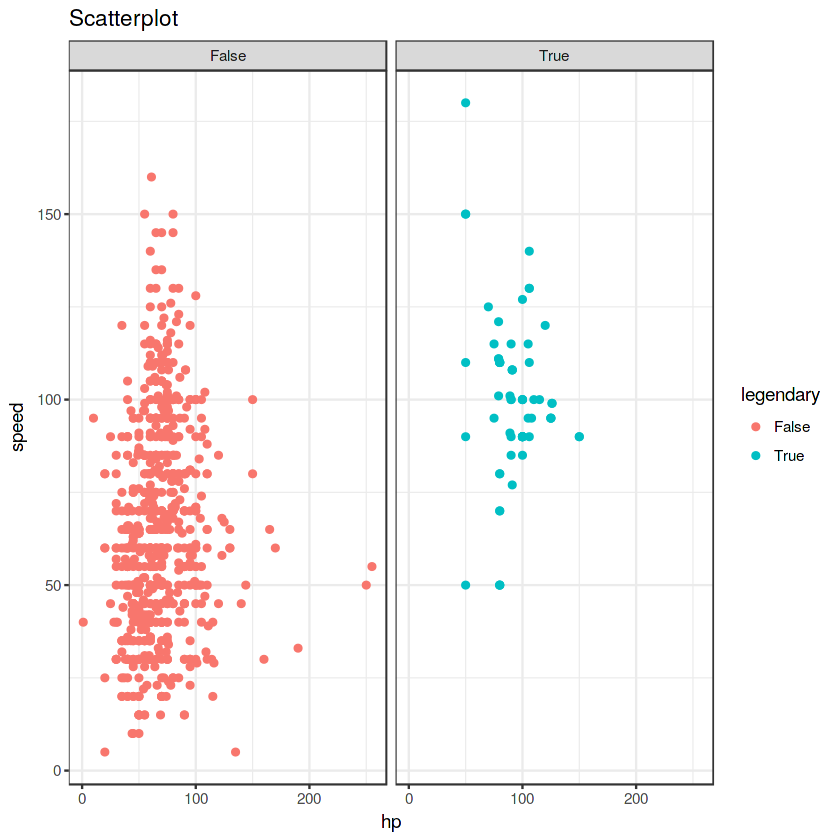

In [149]:
ggplot(pokemon, aes(hp, speed)) + geom_point(aes(color = legendary)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ legendary)

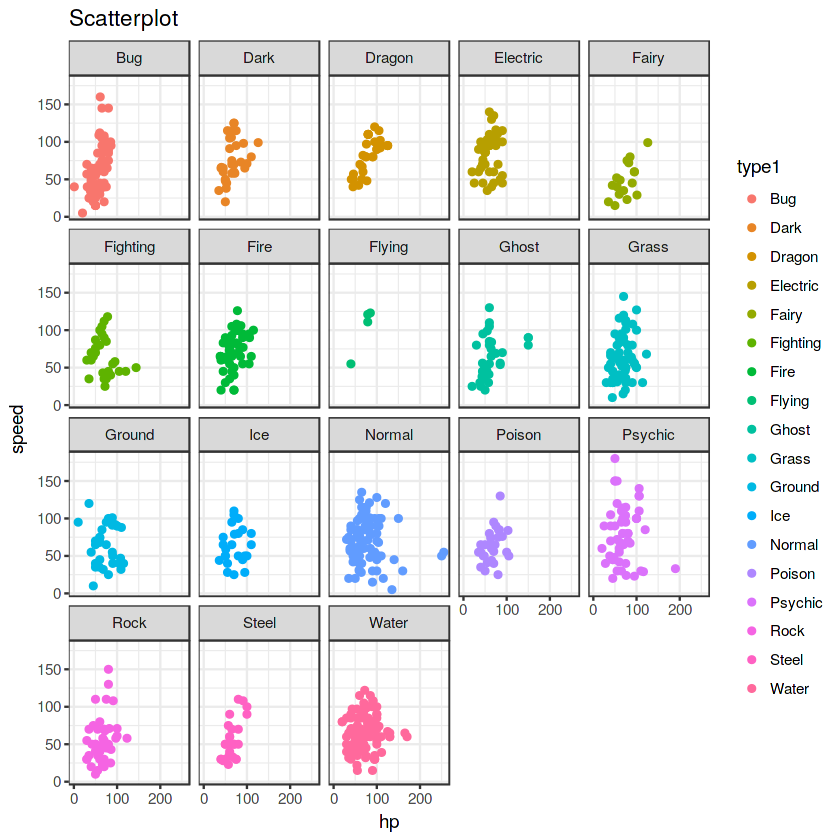

In [150]:
ggplot(pokemon, aes(hp, speed)) + geom_point(aes(color = type1)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type1)

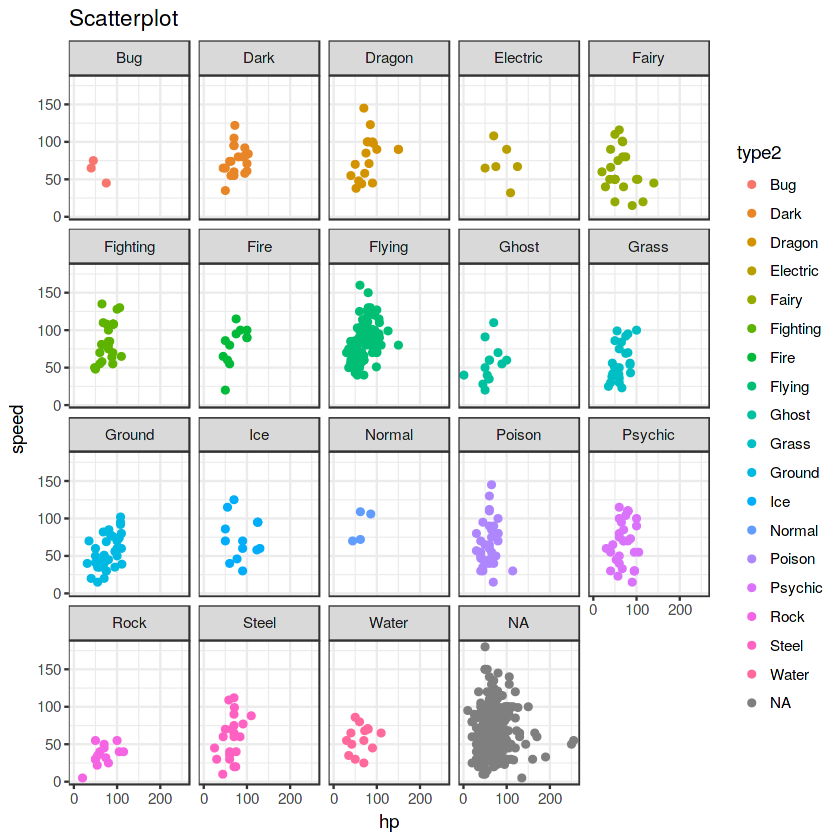

In [151]:
ggplot(pokemon, aes(hp, speed)) + geom_point(aes(color = type2)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type2)

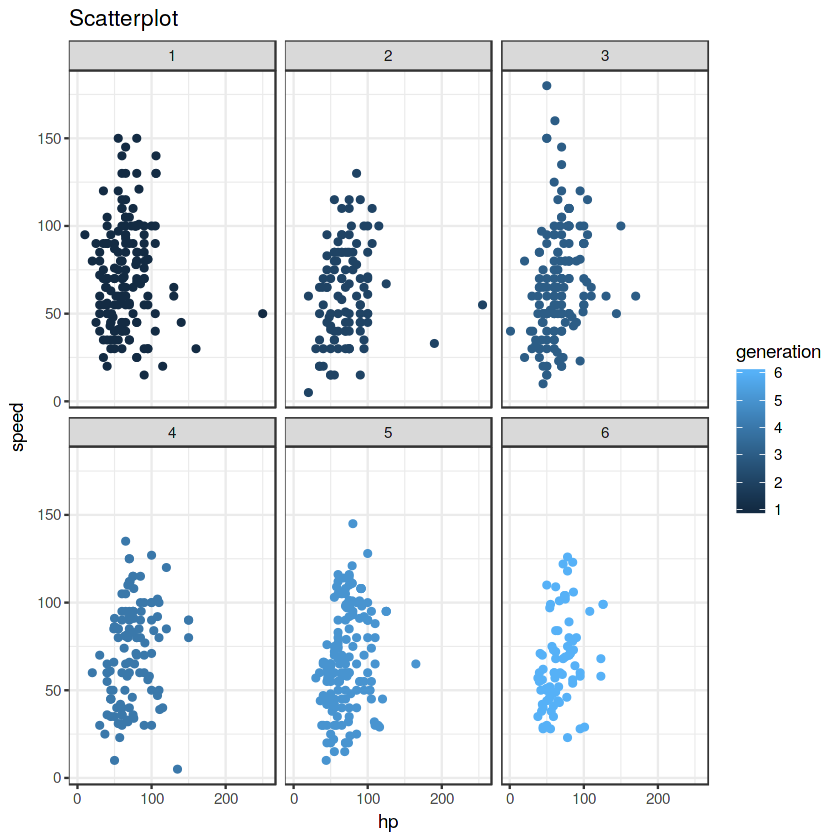

In [152]:
ggplot(pokemon, aes(hp, speed)) + geom_point(aes(color = generation)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ generation)

> Attack vs speed

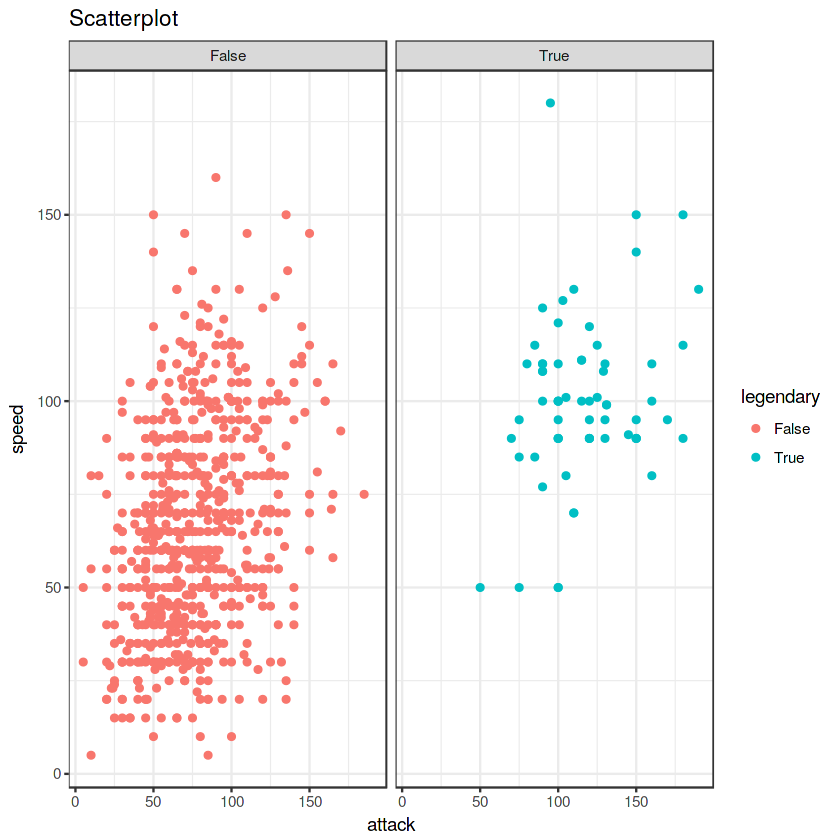

In [153]:
ggplot(pokemon, aes(attack, speed)) + geom_point(aes(color = legendary)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ legendary)

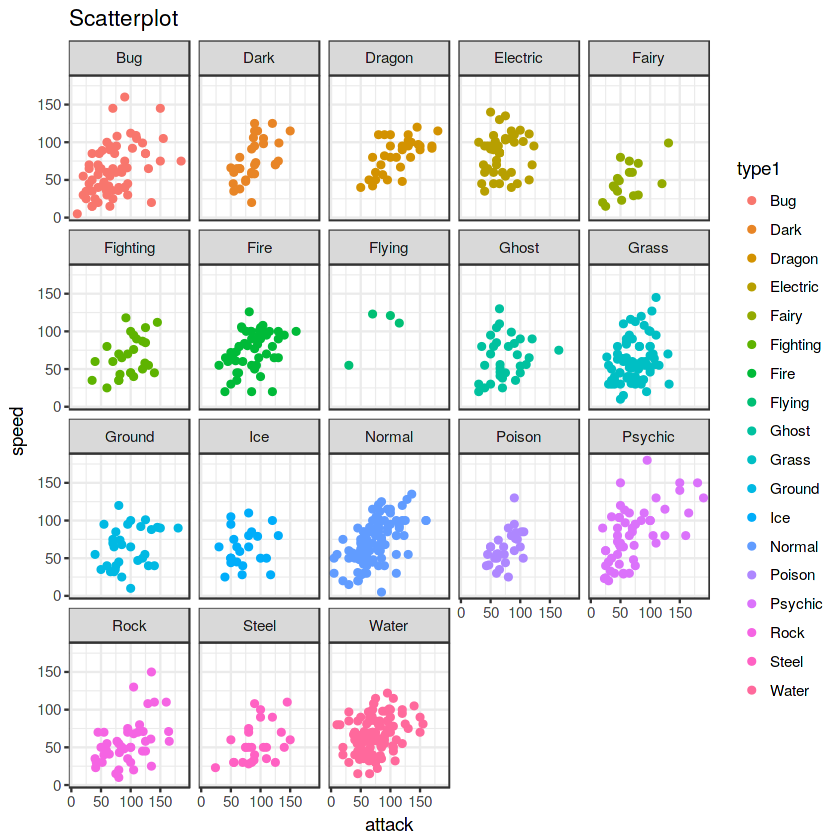

In [154]:
ggplot(pokemon, aes(attack, speed)) + geom_point(aes(color = type1)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type1)

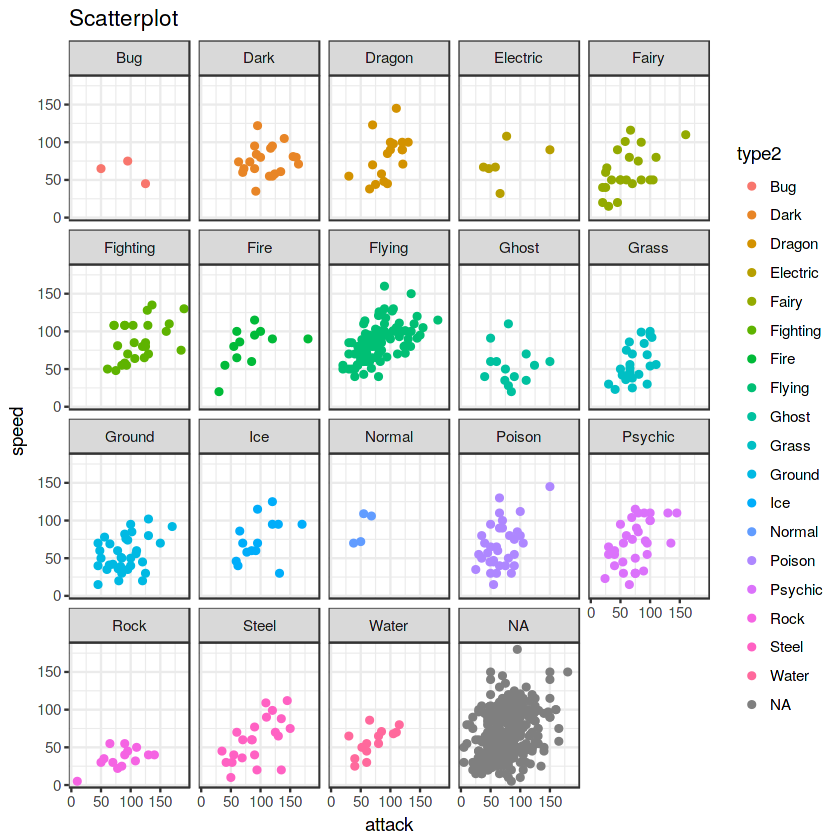

In [155]:
ggplot(pokemon, aes(attack, speed)) + geom_point(aes(color = type2)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type2)

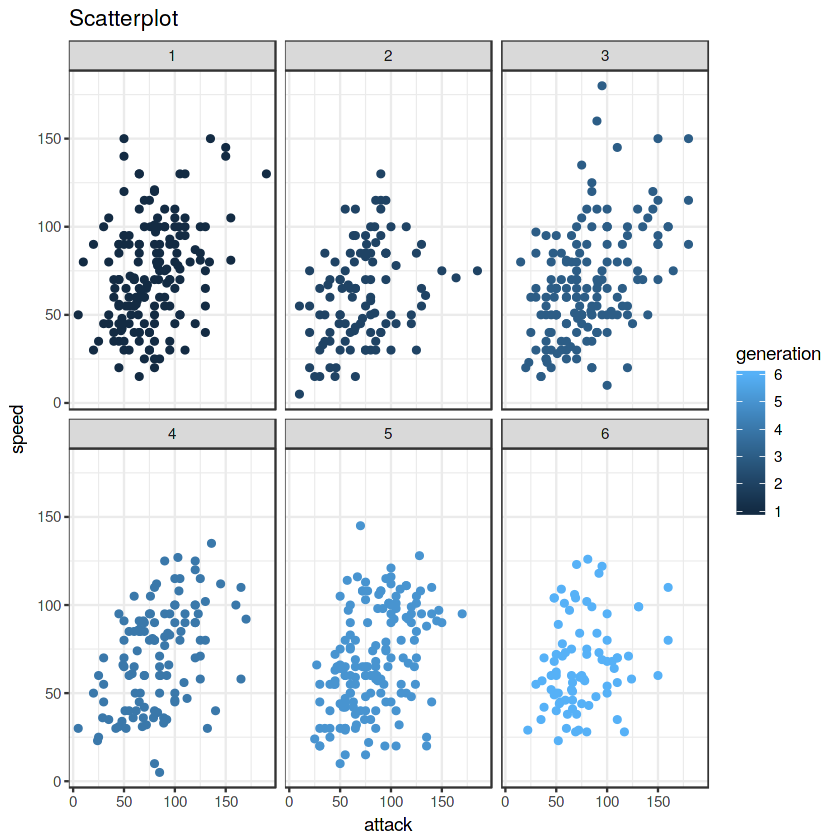

In [156]:
ggplot(pokemon, aes(attack, speed)) + geom_point(aes(color = generation)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ generation)

> Defense vs speed

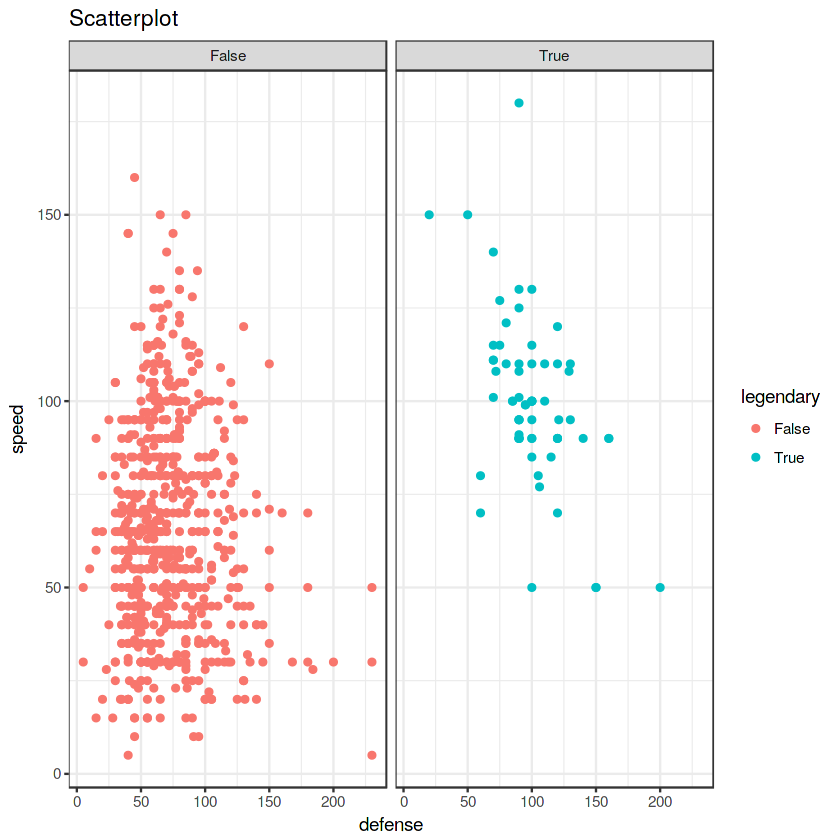

In [157]:
ggplot(pokemon, aes(defense, speed)) + geom_point(aes(color = legendary)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ legendary)

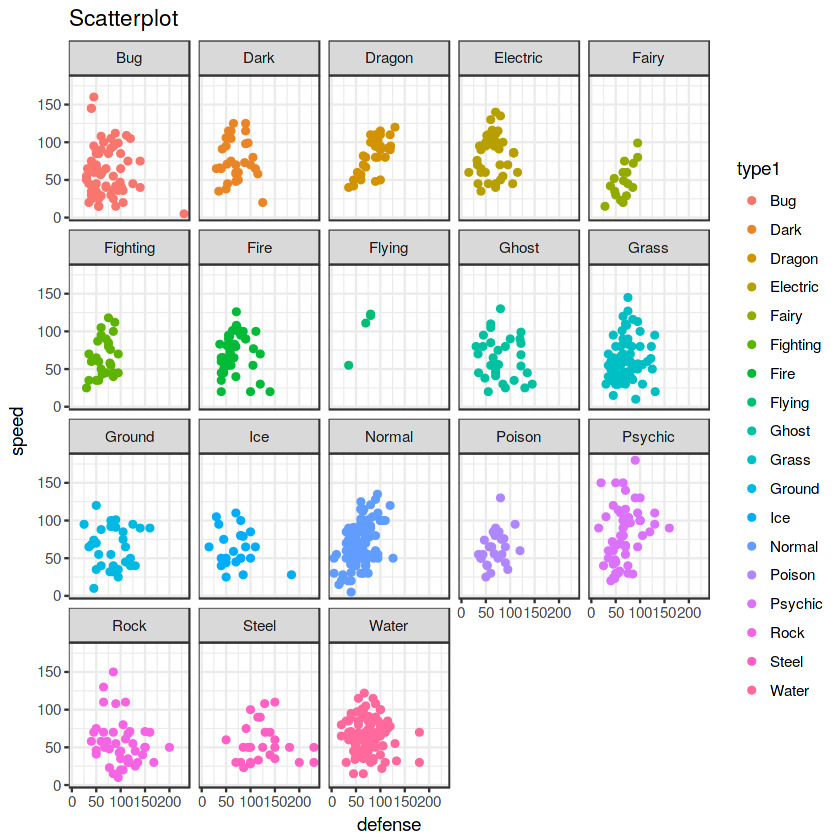

In [158]:
ggplot(pokemon, aes(defense, speed)) + geom_point(aes(color = type1)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type1)

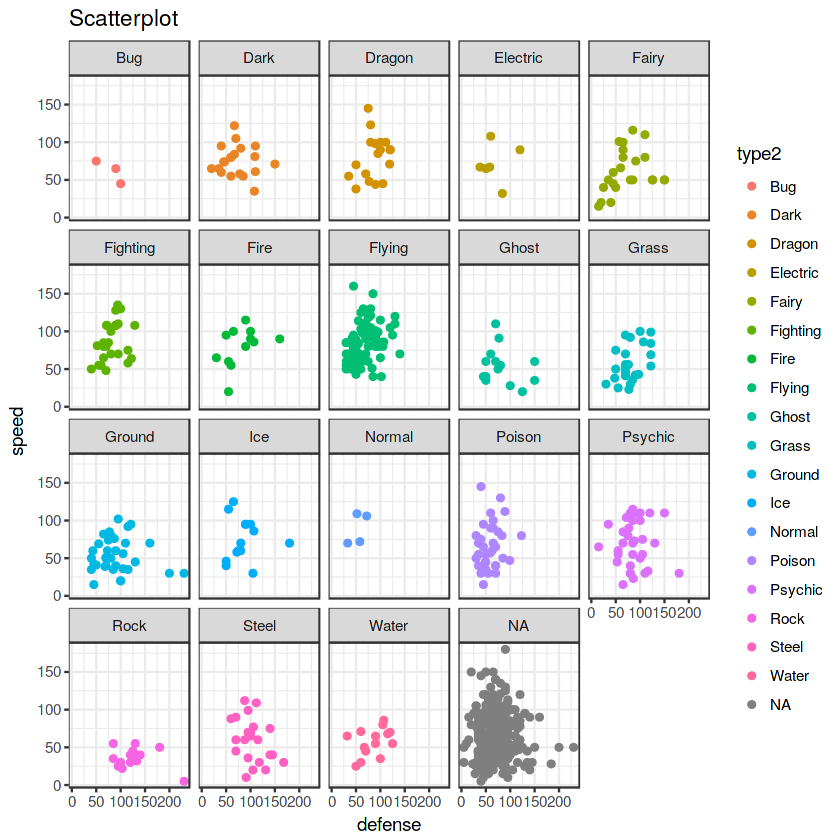

In [159]:
ggplot(pokemon, aes(defense, speed)) + geom_point(aes(color = type2)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type2)

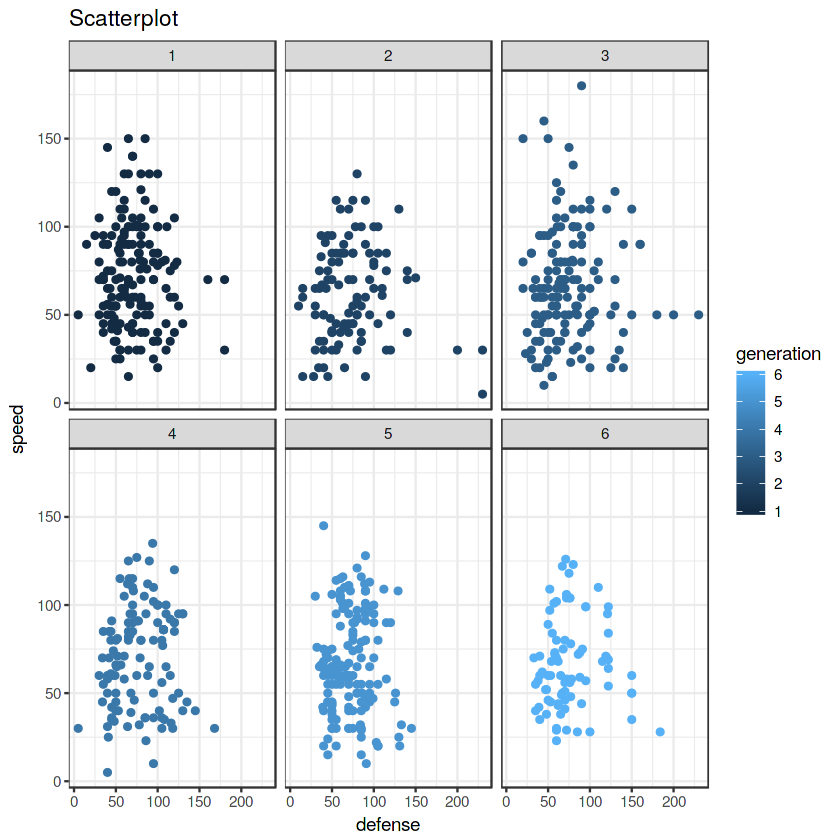

In [160]:
ggplot(pokemon, aes(defense, speed)) + geom_point(aes(color = generation)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ generation)

> defense vs hp

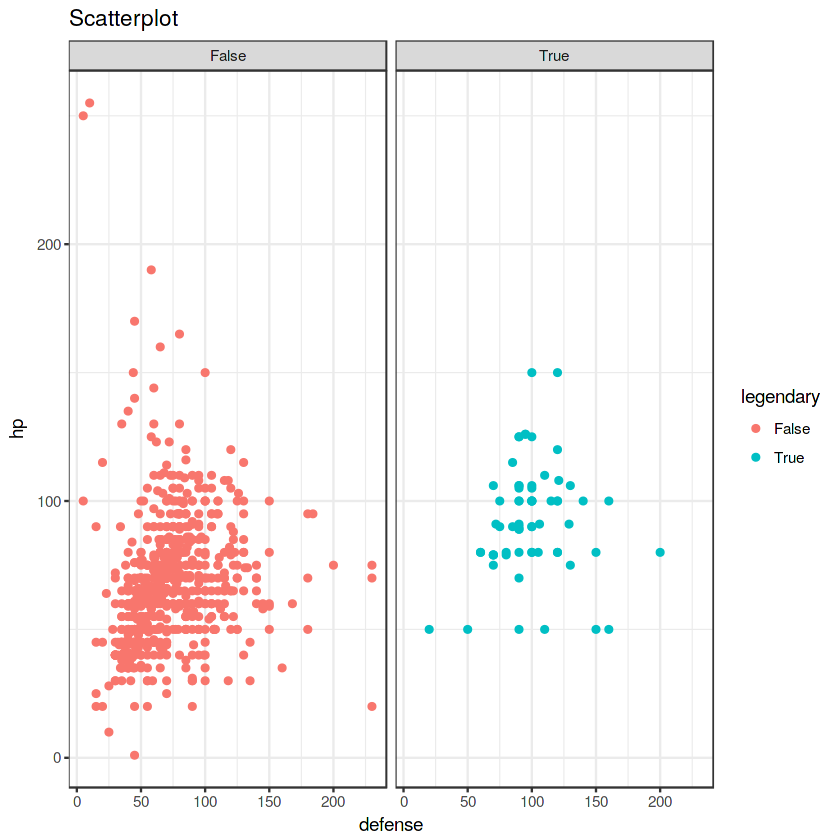

In [161]:
ggplot(pokemon, aes(defense, hp)) + geom_point(aes(color = legendary)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ legendary)

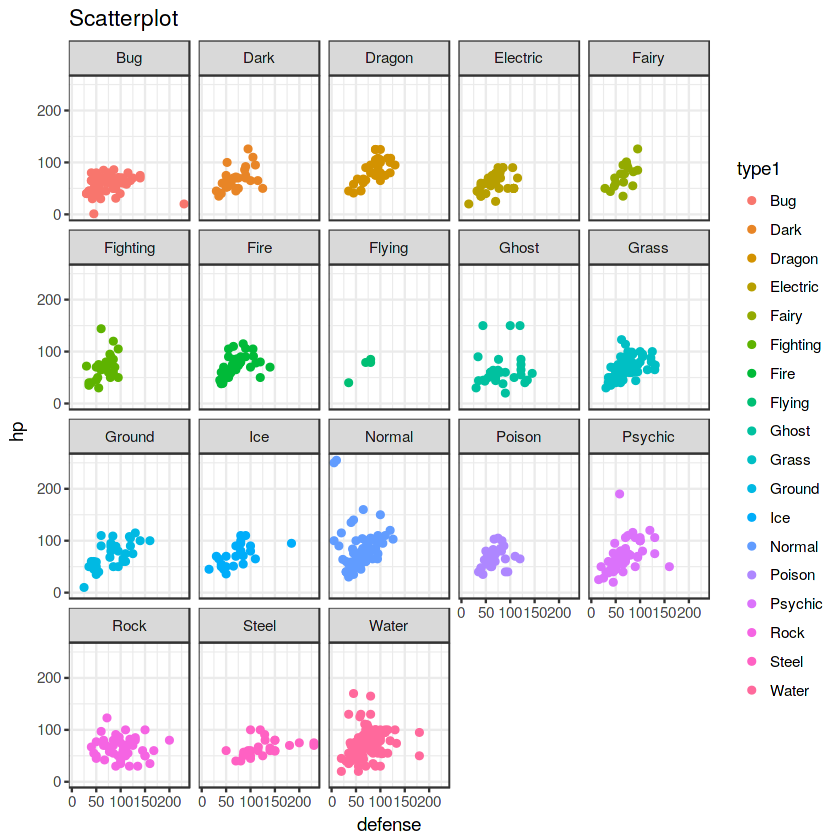

In [162]:
ggplot(pokemon, aes(defense, hp)) + geom_point(aes(color = type1)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type1)

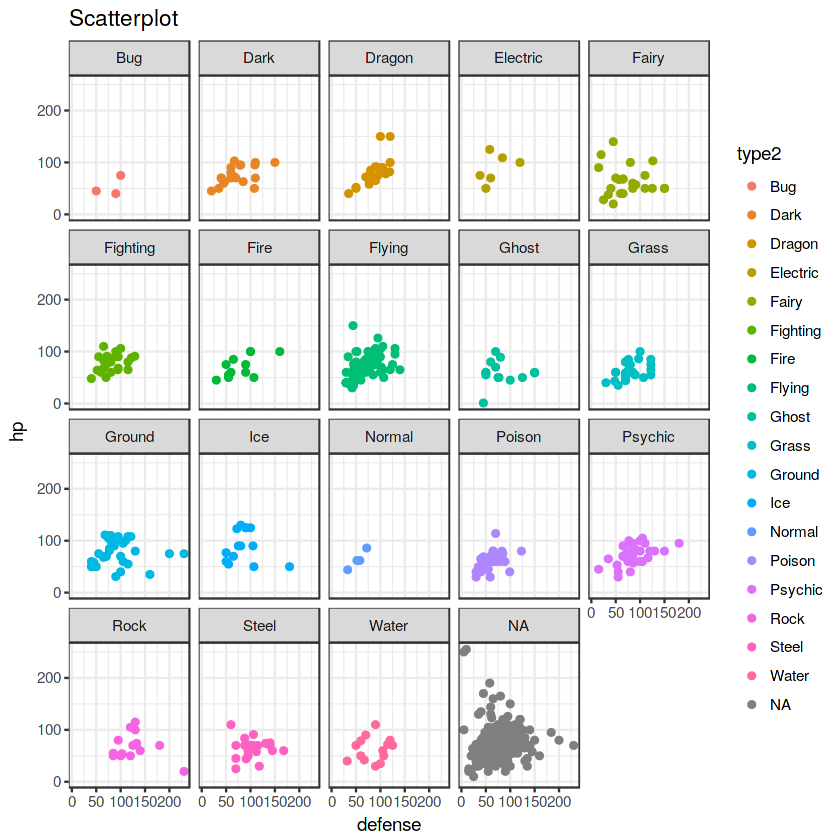

In [163]:
ggplot(pokemon, aes(defense, hp)) + geom_point(aes(color = type2)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type2)

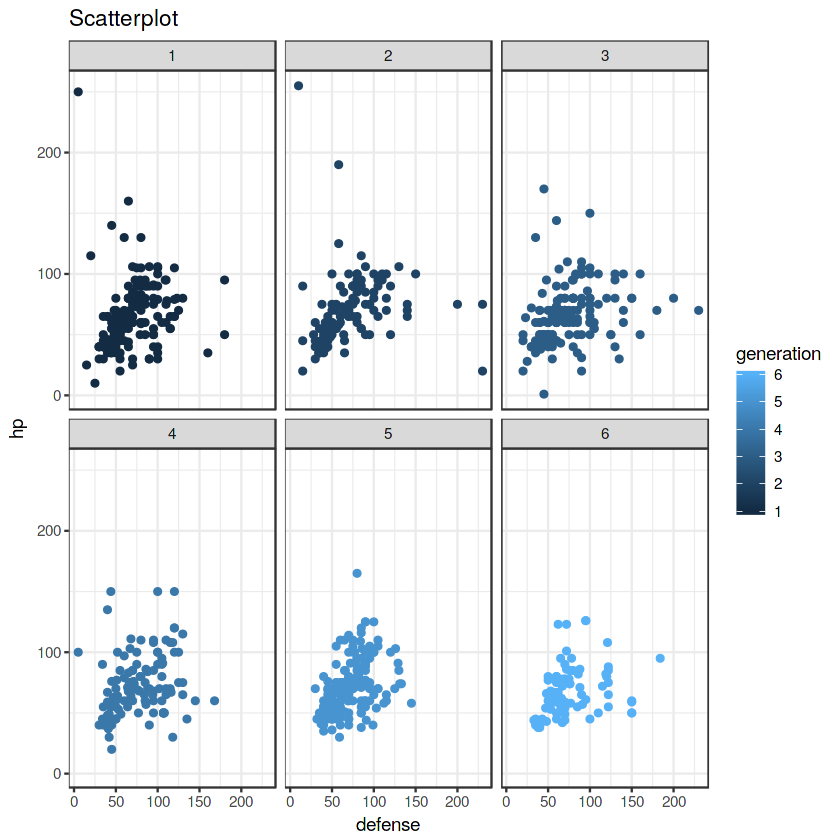

In [164]:
ggplot(pokemon, aes(defense, hp)) + geom_point(aes(color = generation)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ generation)

> Attack vs hp

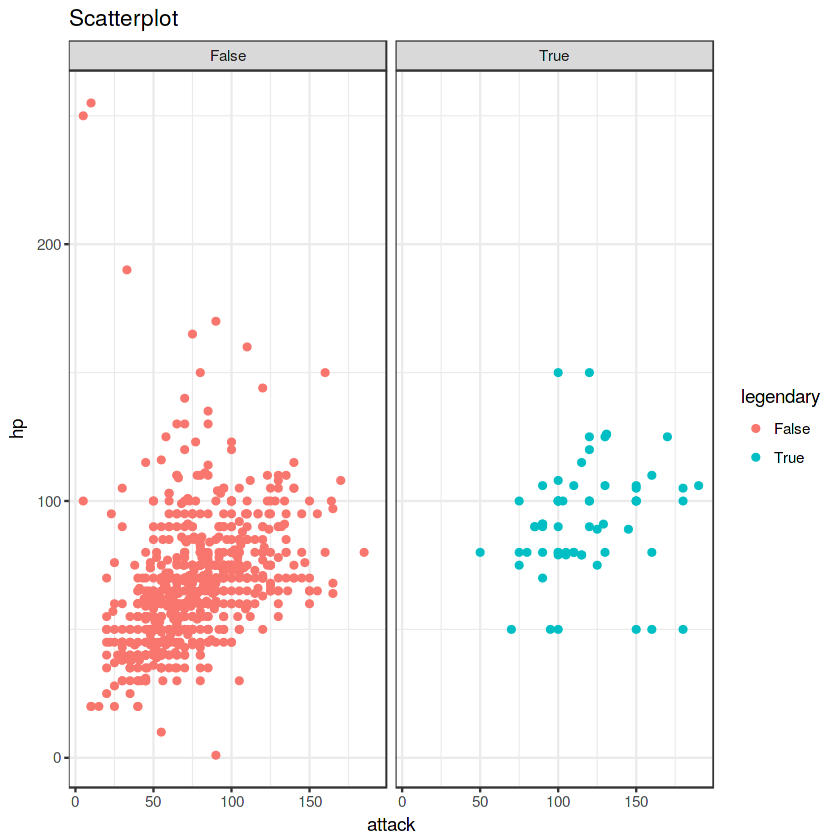

In [165]:
ggplot(pokemon, aes(attack, hp)) + geom_point(aes(color = legendary)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ legendary)

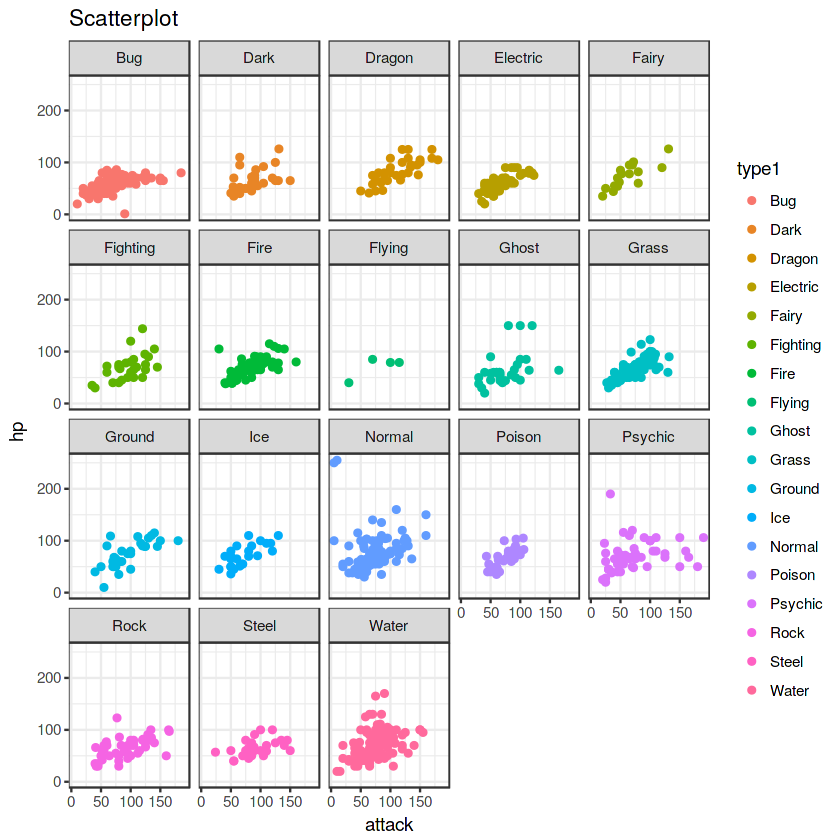

In [166]:
ggplot(pokemon, aes(attack, hp)) + geom_point(aes(color = type1)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type1)

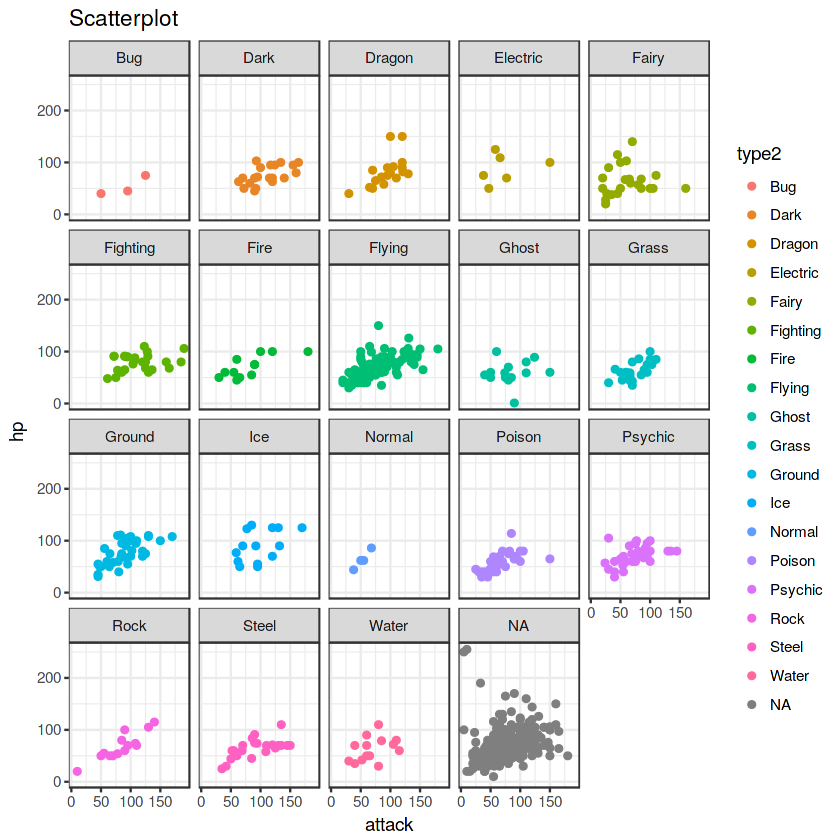

In [167]:
ggplot(pokemon, aes(attack, hp)) + geom_point(aes(color = type2)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ type2)

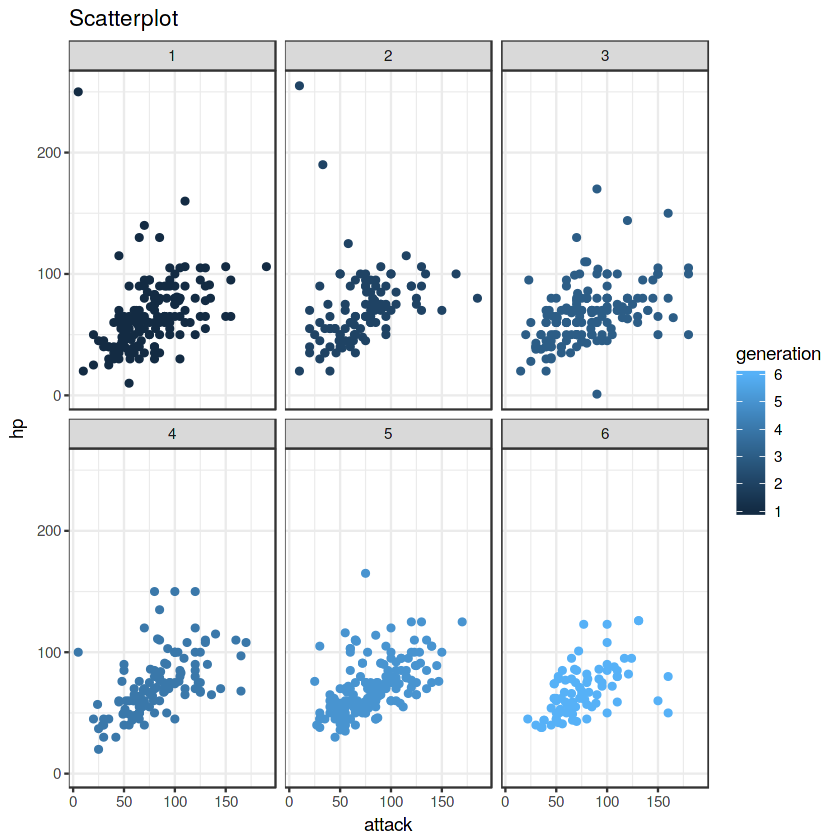

In [168]:
ggplot(pokemon, aes(attack, hp)) + geom_point(aes(color = generation)) +
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ generation)

In [169]:
library(dplyr)
pokemon1 <- pokemon

pokemon2 <- pokemon1 %>% 
         group_by(type1) %>%
         summarise(avg_speed = mean(speed), avg_hp = mean(hp), avg_attack = mean(attack), avg_defense
                   = mean(defense), avg_sp_attack = mean(special_attack), avg_sp_defense = mean(special_defense))
pokemon2

type1    avg_speed avg_hp   avg_attack avg_defense avg_sp_attack
1  Bug       61.68116 56.88406  70.97101   70.72464   53.86957     
2  Dark      76.16129 66.80645  88.38710   70.22581   74.64516     
3  Dragon    83.03125 83.31250 112.12500   86.37500   96.84375     
4  Electric  84.50000 59.79545  69.09091   66.29545   90.02273     
5  Fairy     48.58824 74.11765  61.52941   65.70588   78.52941     
6  Fighting  66.07407 69.85185  96.77778   65.92593   53.11111     
7  Fire      74.44231 69.90385  84.76923   67.76923   88.98077     
8  Flying   102.50000 70.75000  78.75000   66.25000   94.25000     
9  Ghost     64.34375 64.43750  73.78125   81.18750   79.34375     
10 Grass     61.92857 67.27143  73.21429   70.80000   77.50000     
11 Ground    63.90625 73.78125  95.75000   84.84375   56.46875     
12 Ice       63.45833 72.00000  72.75000   71.41667   77.54167     
13 Normal    71.55102 77.27551  73.46939   59.84694   55.81633     
14 Poison    63.57143 67.25000  74.67857   68.82143   60.42857     
15 Psychic   81.49123 70.63158  71.45614   67.68421   98.40351     
16 Rock      55.90909 65.36364  92.86364  100.79545   63.34091     
17 Steel     55.25926 65.22222  92.70370  126.37037   67.51852     
18 Water     65.96429 72.06250  74.15179   72.94643   74.81250     
   avg_sp_defense
1  64.79710      
2  69.51613      
3  88.84375      
4  73.70455      
5  84.70588      
6  64.70370      
7  72.21154      
8  72.50000      
9  76.46875      
10 70.42857      
11 62.75000      
12 76.29167      
13 63.72449      
14 64.39286      
15 86.28070      
16 75.47727      
17 80.62963      
18 70.51786

In [170]:
library(tidyr)
pokemon3 <- gather(pokemon2, my_key, my_val, 2:7)
pokemon3

type1    my_key         my_val   
1   Bug      avg_speed       61.68116
2   Dark     avg_speed       76.16129
3   Dragon   avg_speed       83.03125
4   Electric avg_speed       84.50000
5   Fairy    avg_speed       48.58824
6   Fighting avg_speed       66.07407
7   Fire     avg_speed       74.44231
8   Flying   avg_speed      102.50000
9   Ghost    avg_speed       64.34375
10  Grass    avg_speed       61.92857
11  Ground   avg_speed       63.90625
12  Ice      avg_speed       63.45833
13  Normal   avg_speed       71.55102
14  Poison   avg_speed       63.57143
15  Psychic  avg_speed       81.49123
16  Rock     avg_speed       55.90909
17  Steel    avg_speed       55.25926
18  Water    avg_speed       65.96429
19  Bug      avg_hp          56.88406
20  Dark     avg_hp          66.80645
21  Dragon   avg_hp          83.31250
22  Electric avg_hp          59.79545
23  Fairy    avg_hp          74.11765
24  Fighting avg_hp          69.85185
25  Fire     avg_hp          69.90385
26  Flying   avg_hp          70.75000
27  Ghost    avg_hp          64.43750
28  Grass    avg_hp          67.27143
29  Ground   avg_hp          73.78125
30  Ice      avg_hp          72.00000
⋮   ⋮        ⋮              ⋮        
79  Fire     avg_sp_attack  88.98077 
80  Flying   avg_sp_attack  94.25000 
81  Ghost    avg_sp_attack  79.34375 
82  Grass    avg_sp_attack  77.50000 
83  Ground   avg_sp_attack  56.46875 
84  Ice      avg_sp_attack  77.54167 
85  Normal   avg_sp_attack  55.81633 
86  Poison   avg_sp_attack  60.42857 
87  Psychic  avg_sp_attack  98.40351 
88  Rock     avg_sp_attack  63.34091 
89  Steel    avg_sp_attack  67.51852 
90  Water    avg_sp_attack  74.81250 
91  Bug      avg_sp_defense 64.79710 
92  Dark     avg_sp_defense 69.51613 
93  Dragon   avg_sp_defense 88.84375 
94  Electric avg_sp_defense 73.70455 
95  Fairy    avg_sp_defense 84.70588 
96  Fighting avg_sp_defense 64.70370 
97  Fire     avg_sp_defense 72.21154 
98  Flying   avg_sp_defense 72.50000 
99  Ghost    avg_sp_defense 76.46875 
100 Grass    avg_sp_defense 70.42857 
101 Ground   avg_sp_defense 62.75000 
102 Ice      avg_sp_defense 76.29167 
103 Normal   avg_sp_defense 63.72449 
104 Poison   avg_sp_defense 64.39286 
105 Psychic  avg_sp_defense 86.28070 
106 Rock     avg_sp_defense 75.47727 
107 Steel    avg_sp_defense 80.62963 
108 Water    avg_sp_defense 70.51786

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


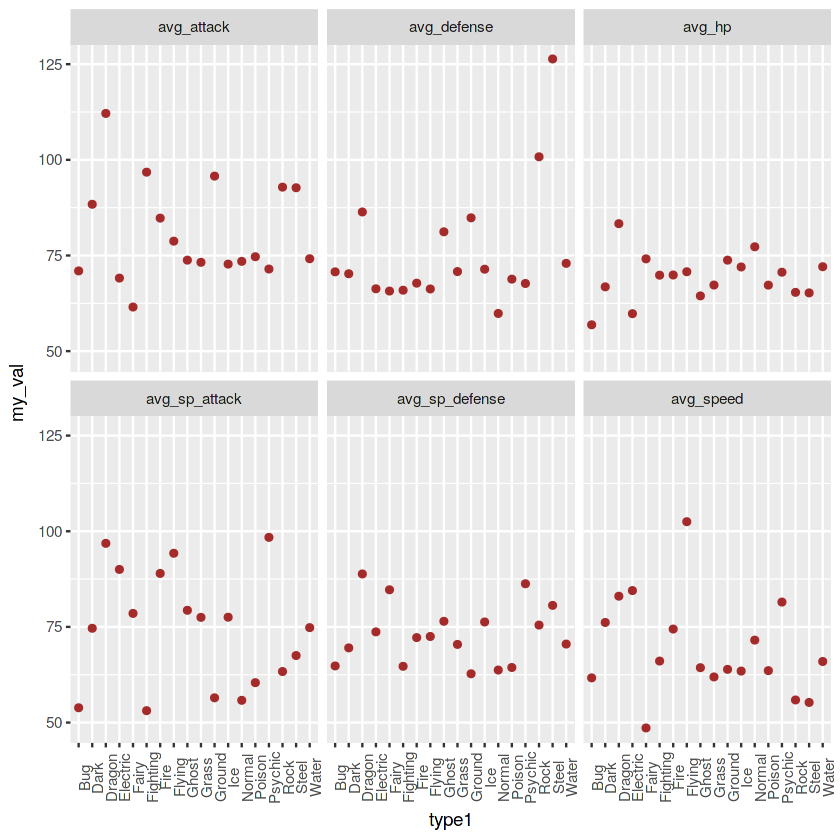

In [171]:
 ggplot(pokemon3, aes(x=type1,y= my_val))+geom_line(color="cornflowerblue")+
                    geom_point(col="brown")+facet_wrap(~my_key) + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

**Histogram**

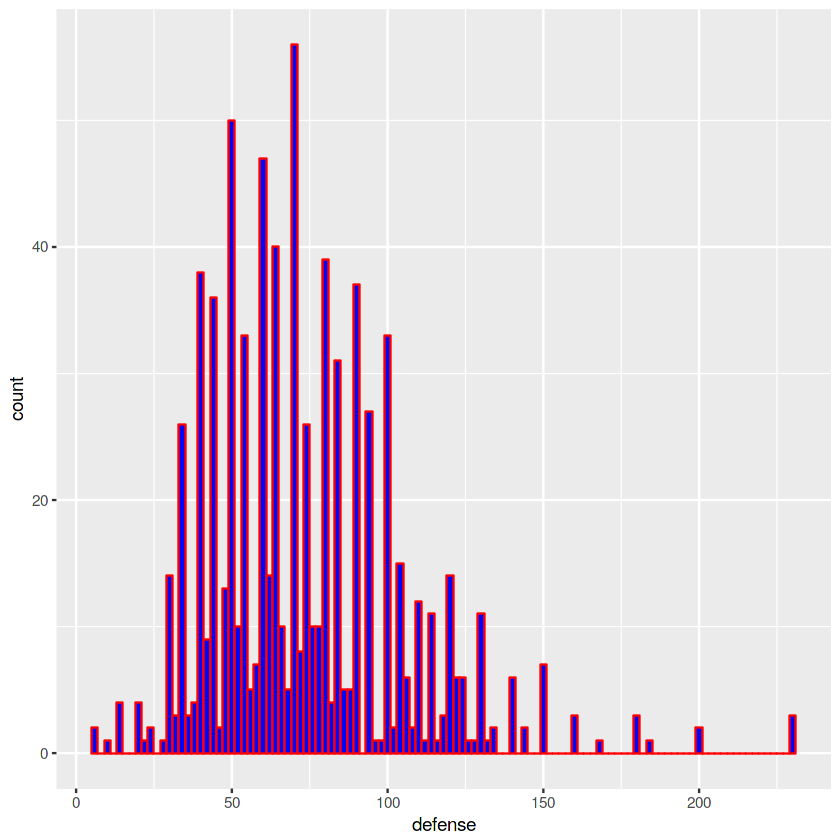

In [172]:
qplot(pokemon$defense,geom="histogram", 
      binwidth = 2, xlab = "defense", fill=I("blue"), 
      col=I("red"))

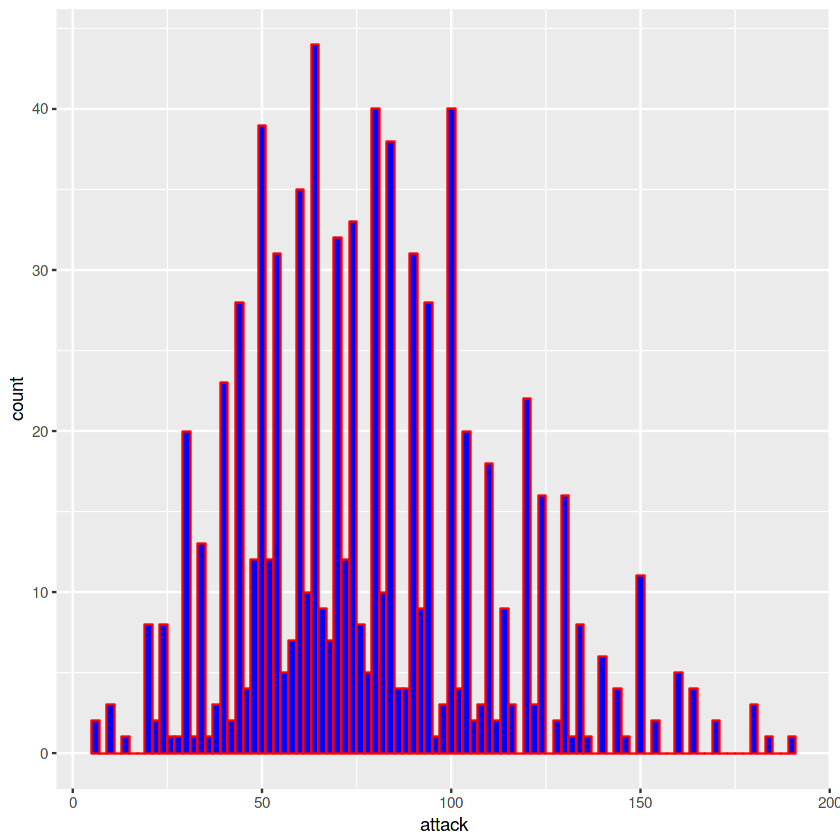

In [173]:
qplot(pokemon$attack,geom="histogram", 
      binwidth = 2, xlab = "attack", fill=I("blue"), 
      col=I("red"))

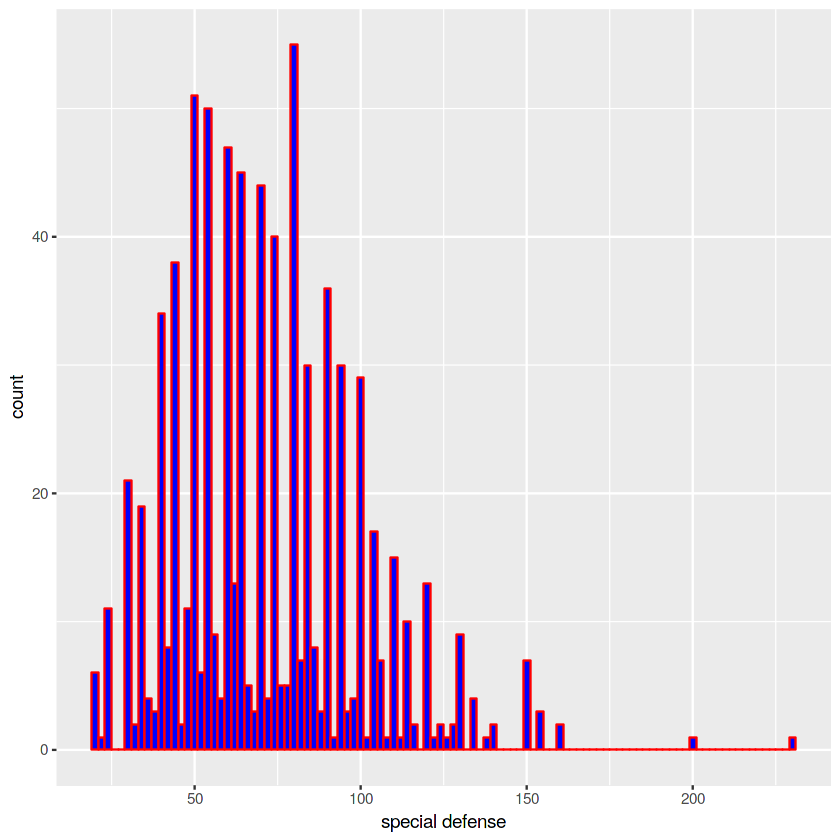

In [174]:
qplot(pokemon$special_defense,geom="histogram", 
      binwidth = 2, xlab = "special defense", fill=I("blue"), 
      col=I("red"))

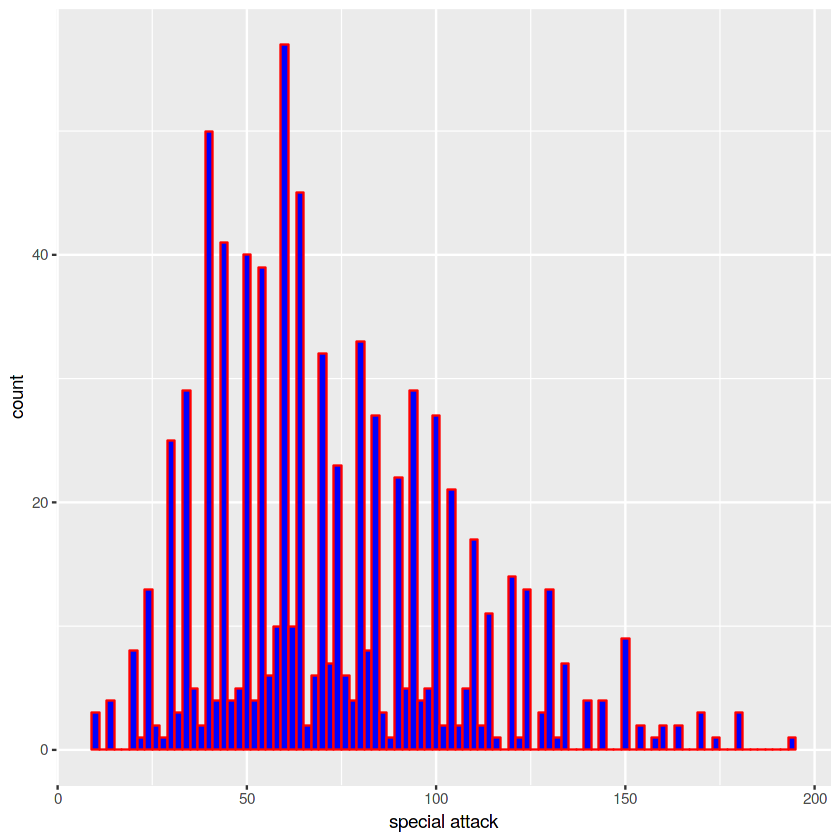

In [175]:
qplot(pokemon$special_attack,geom="histogram", 
      binwidth = 2, xlab = "special attack", fill=I("blue"), 
      col=I("red"))

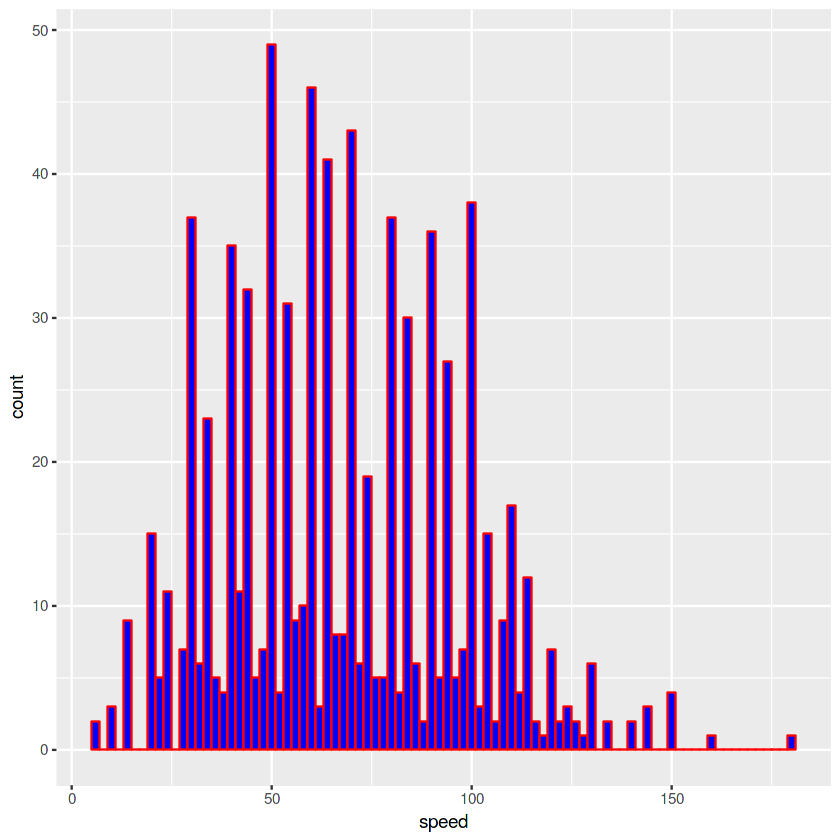

In [176]:
qplot(pokemon$speed,geom="histogram", 
      binwidth = 2, xlab = "speed", fill=I("blue"), 
      col=I("red"))

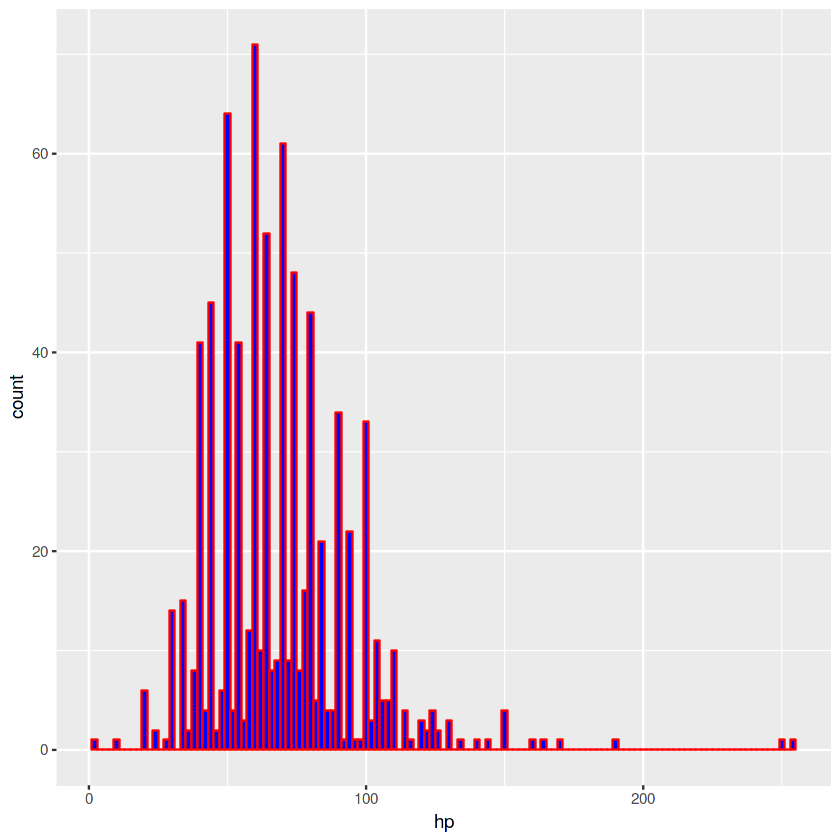

In [177]:
qplot(pokemon$hp,geom="histogram", 
      binwidth = 2, xlab = "hp", fill=I("blue"), 
      col=I("red"))

**geom density**

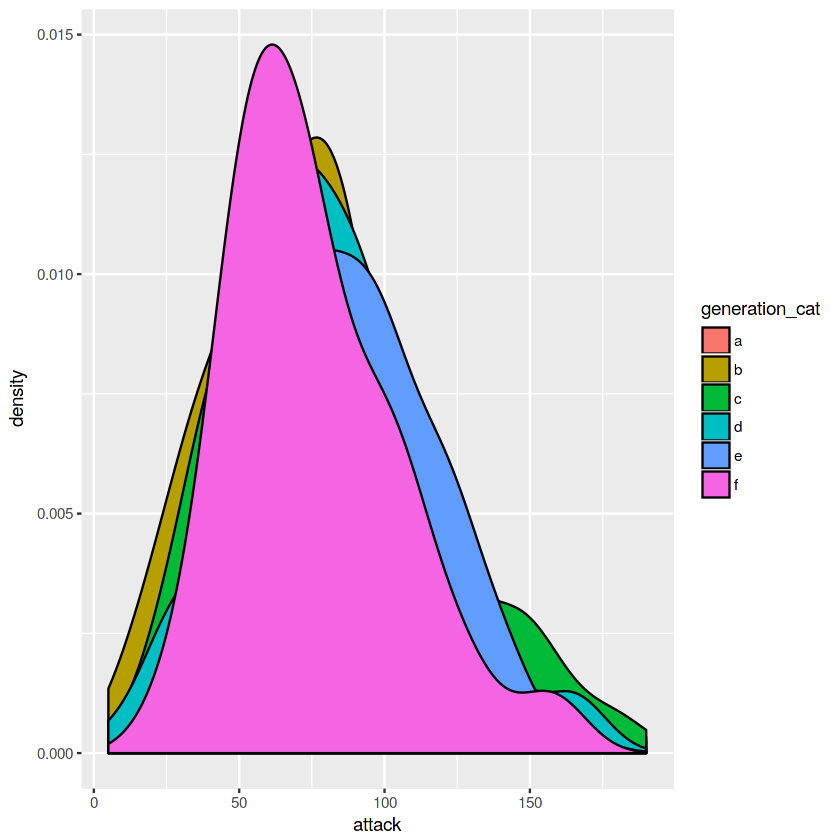

In [178]:
ggplot(pokemon,aes(attack,fill=generation_cat,colours=generation_cat))+geom_density()

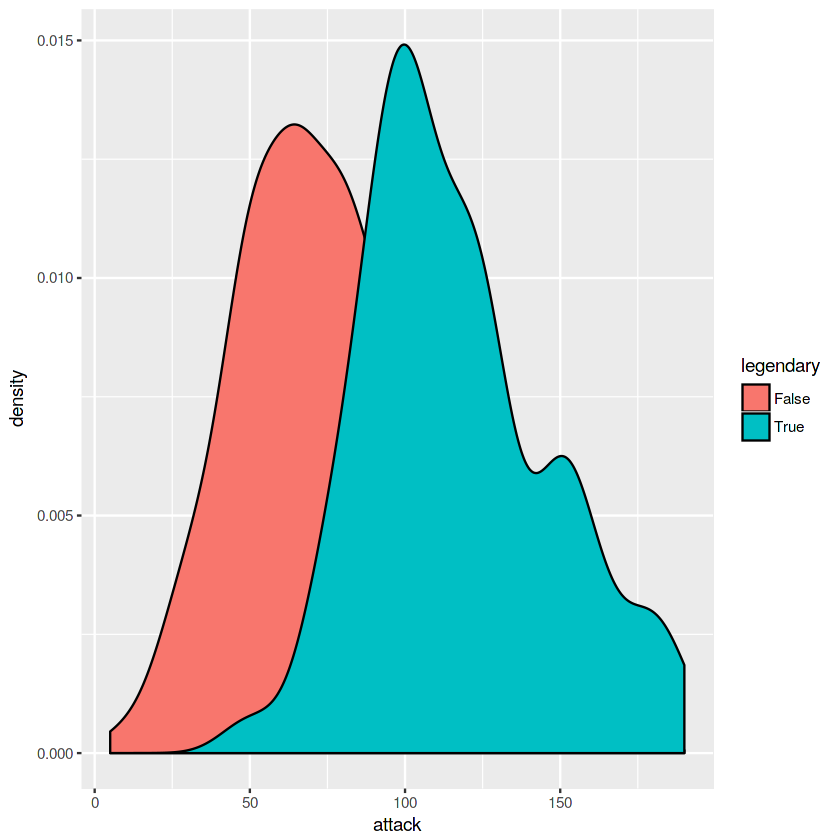

In [179]:
ggplot(pokemon,aes(attack,fill=legendary,colours=legendary))+geom_density()

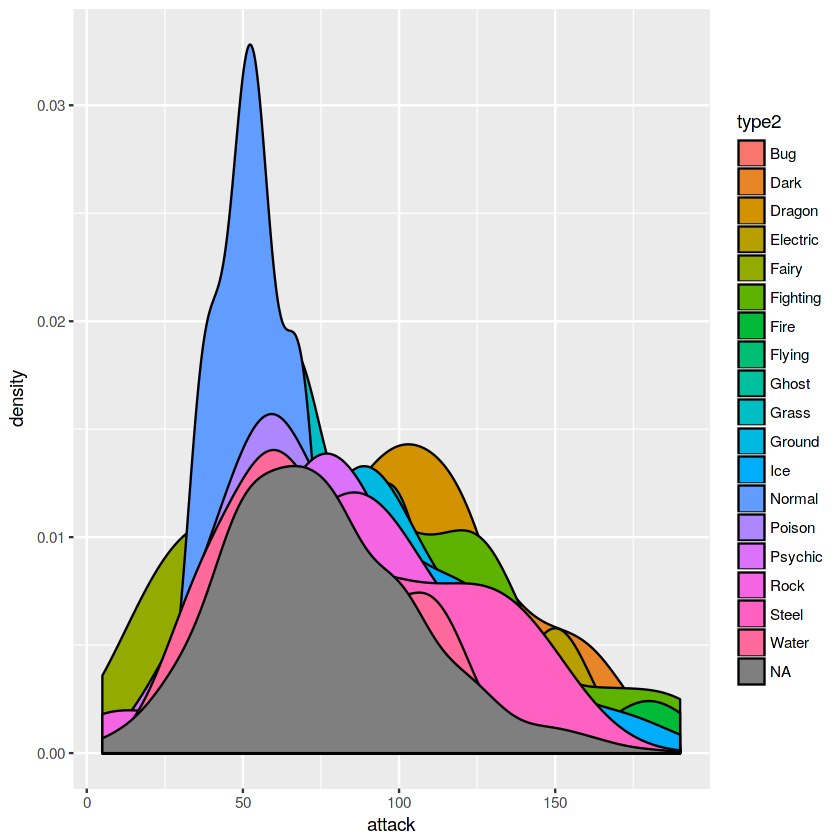

In [180]:
ggplot(pokemon,aes(attack,fill=type2,colours=type2))+geom_density()

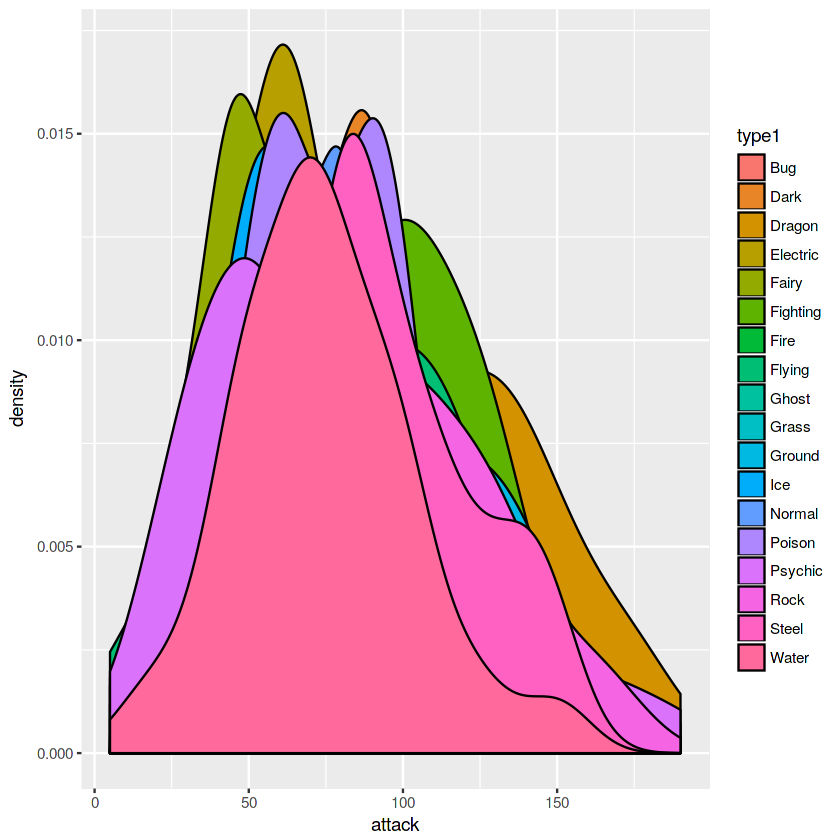

In [181]:
ggplot(pokemon,aes(attack,fill=type1))+geom_density()

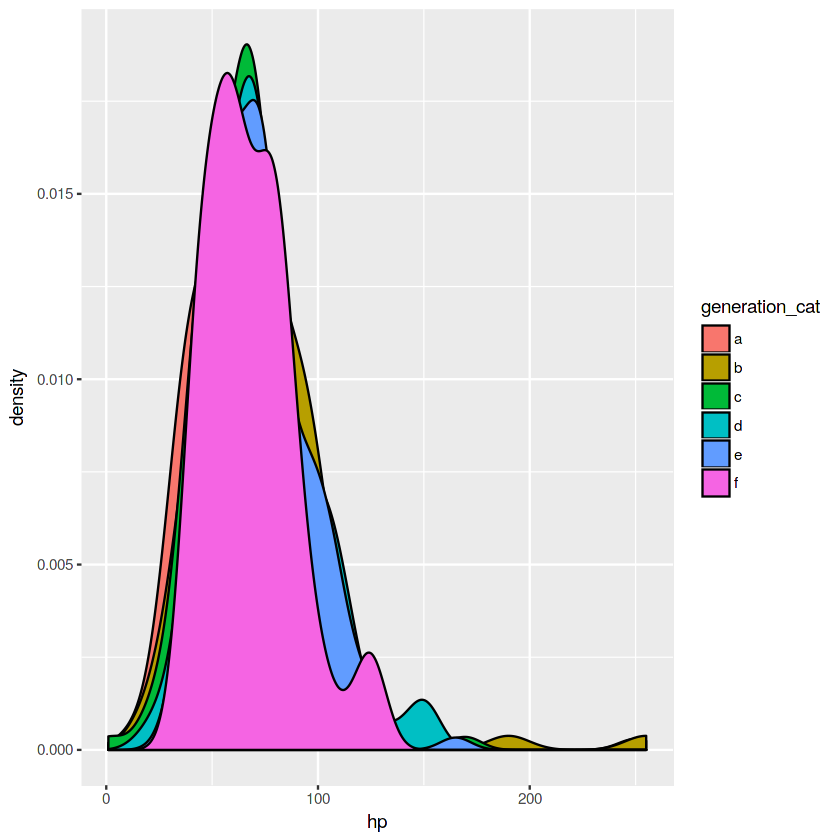

In [182]:
ggplot(pokemon,aes(hp,fill=generation_cat,colours= generation_cat))+geom_density()

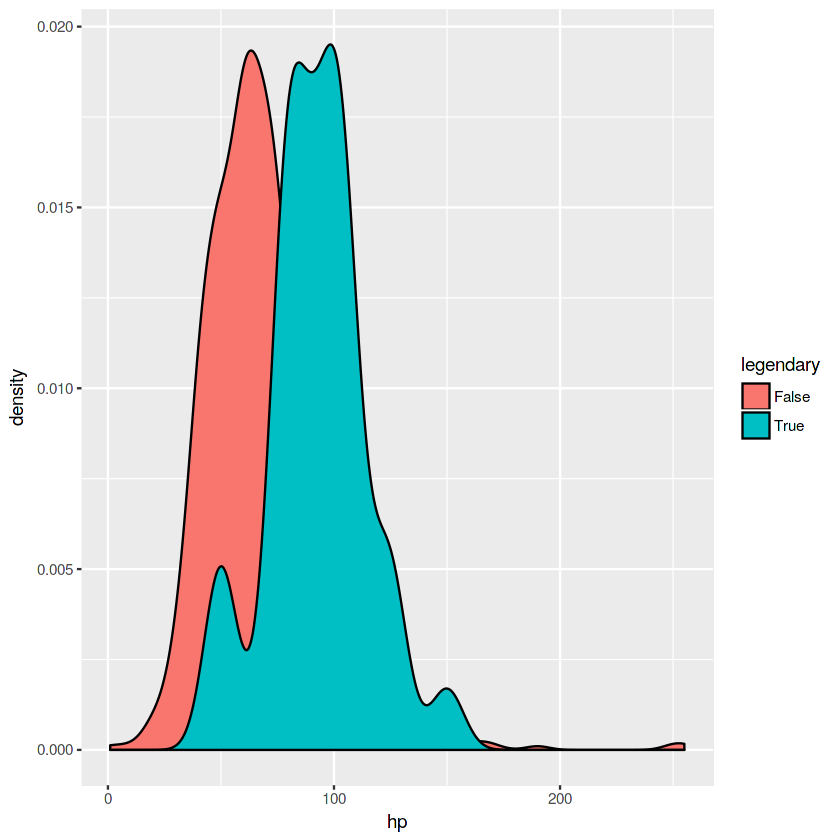

In [183]:
ggplot(pokemon,aes(hp,fill=legendary,colours=legendary))+geom_density()

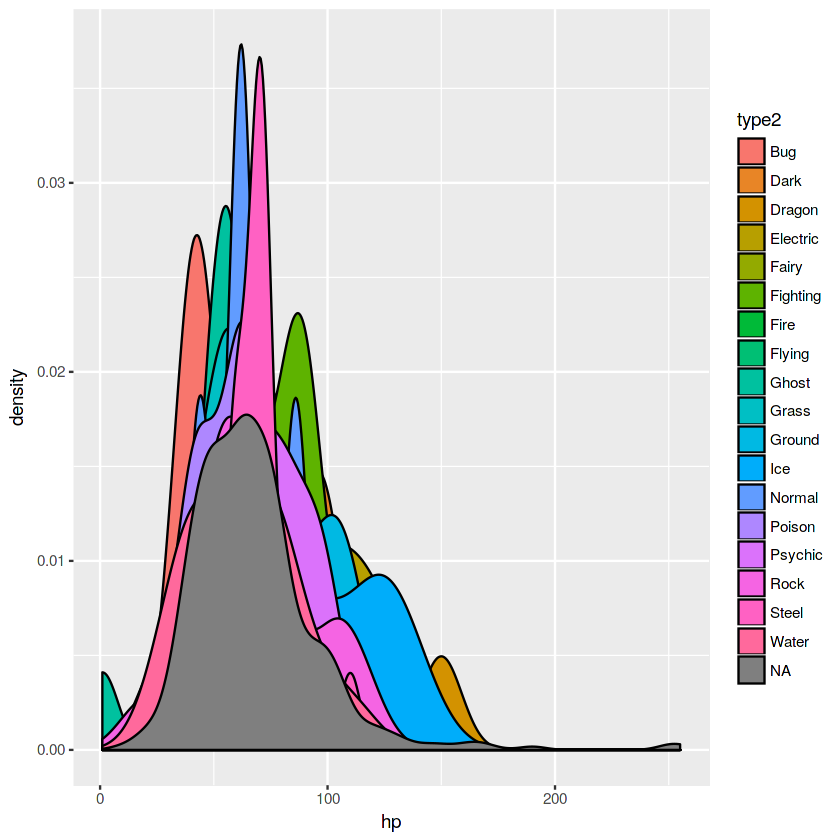

In [184]:
ggplot(pokemon,aes(hp,fill=type2,colours=type2))+geom_density()

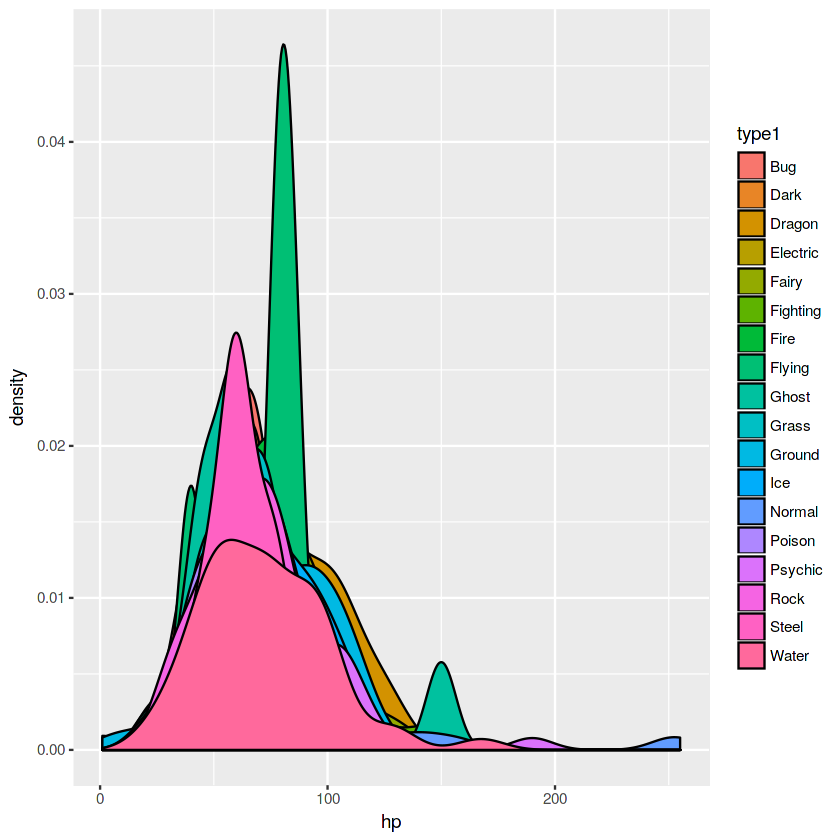

In [185]:
ggplot(pokemon,aes(hp,fill=type1,colours=type1))+geom_density()

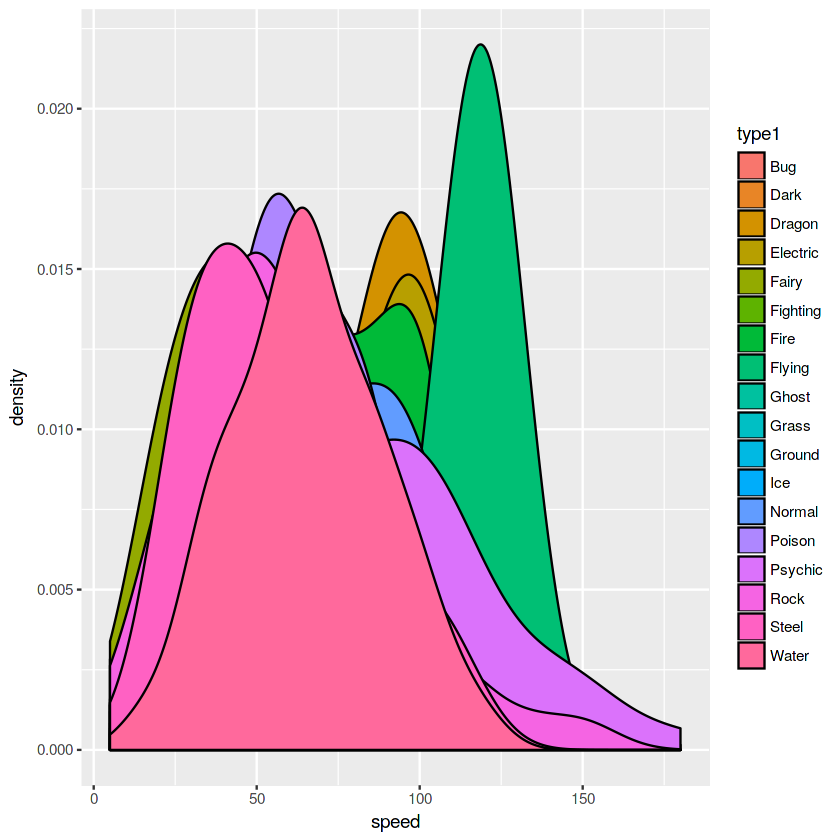

In [186]:
ggplot(pokemon,aes(speed,fill=type1,colours=type1))+geom_density()

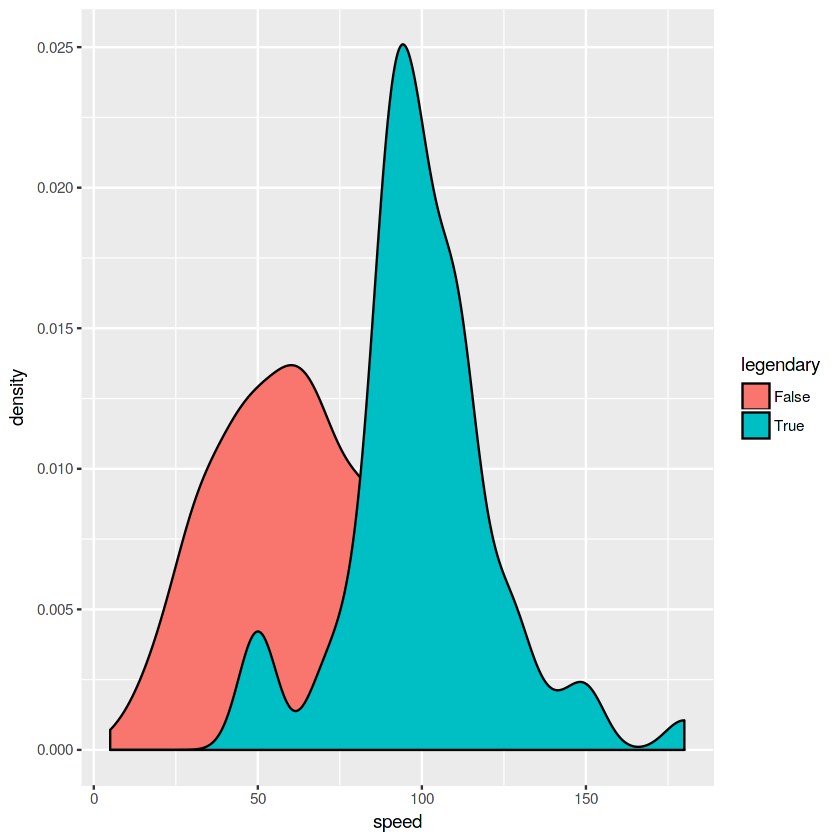

In [187]:
ggplot(pokemon,aes(speed,fill=legendary,colours=legendary))+geom_density()

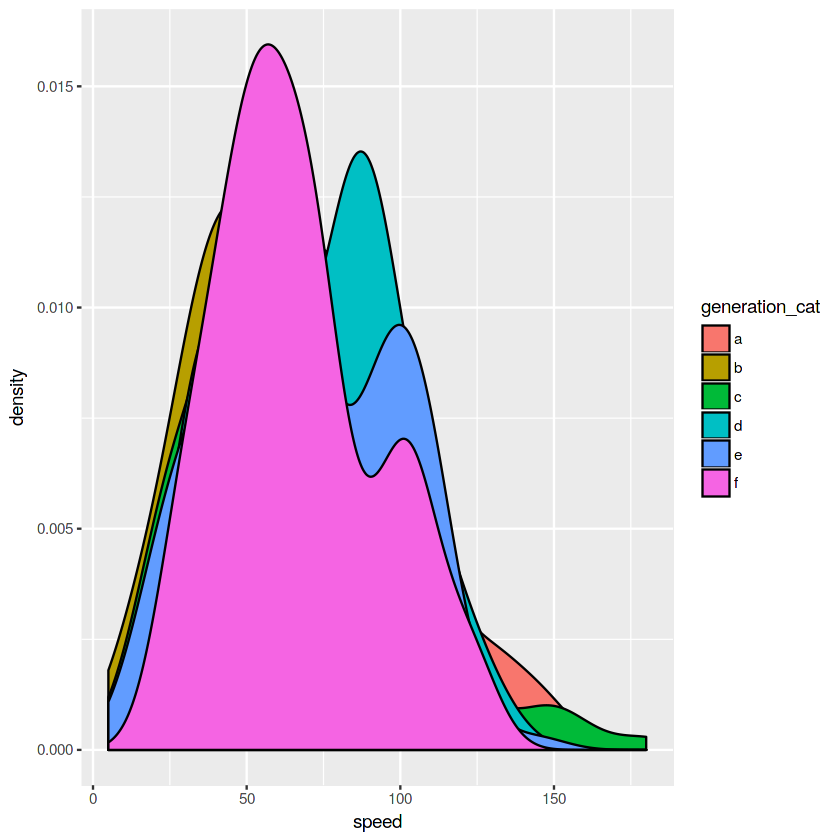

In [188]:
ggplot(pokemon,aes(speed,fill=generation_cat,colours=generation_cat))+geom_density()

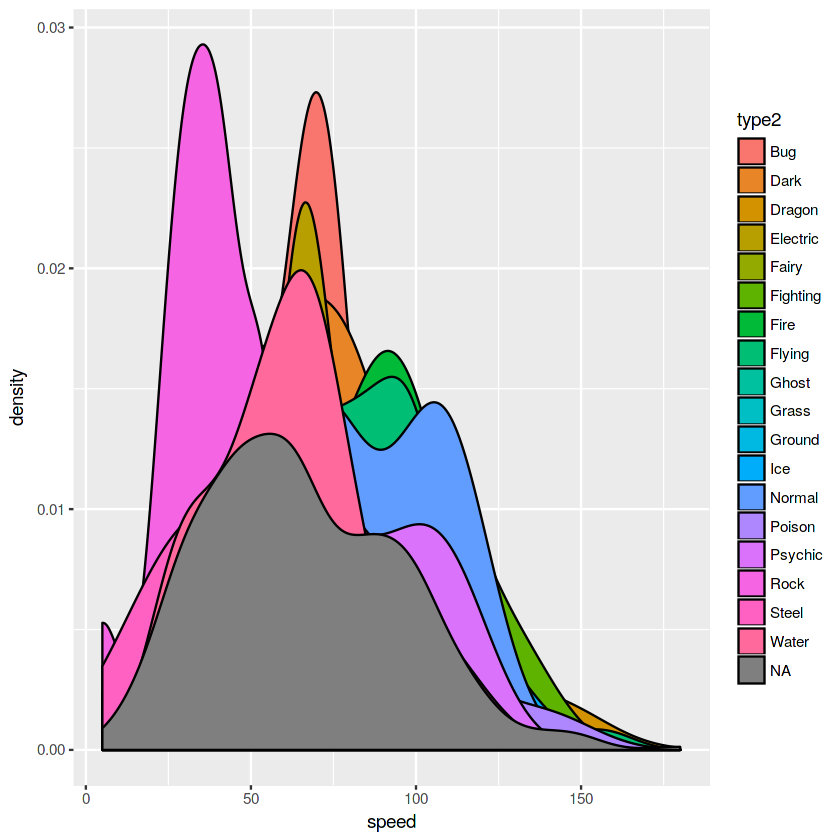

In [189]:
ggplot(pokemon,aes(speed,fill=type2,colours=type2))+geom_density()

**Stacked bar chart**

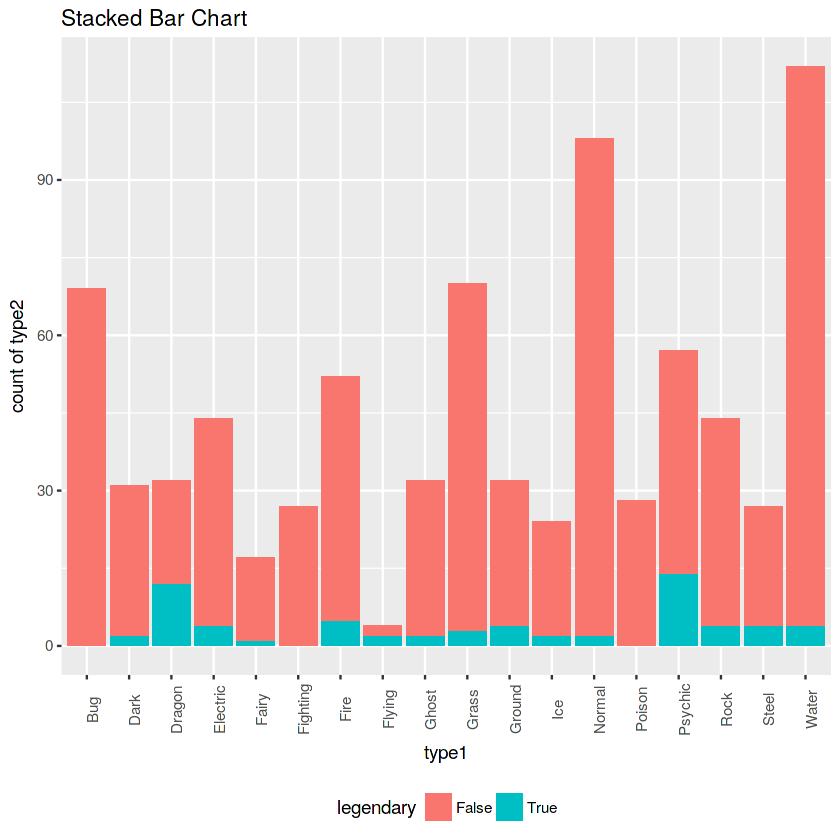

In [190]:
ggplot(pokemon, aes(type1, fill = legendary)) + geom_bar()+
         labs(title = "Stacked Bar Chart", x = "type1", y = "count of type2") + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

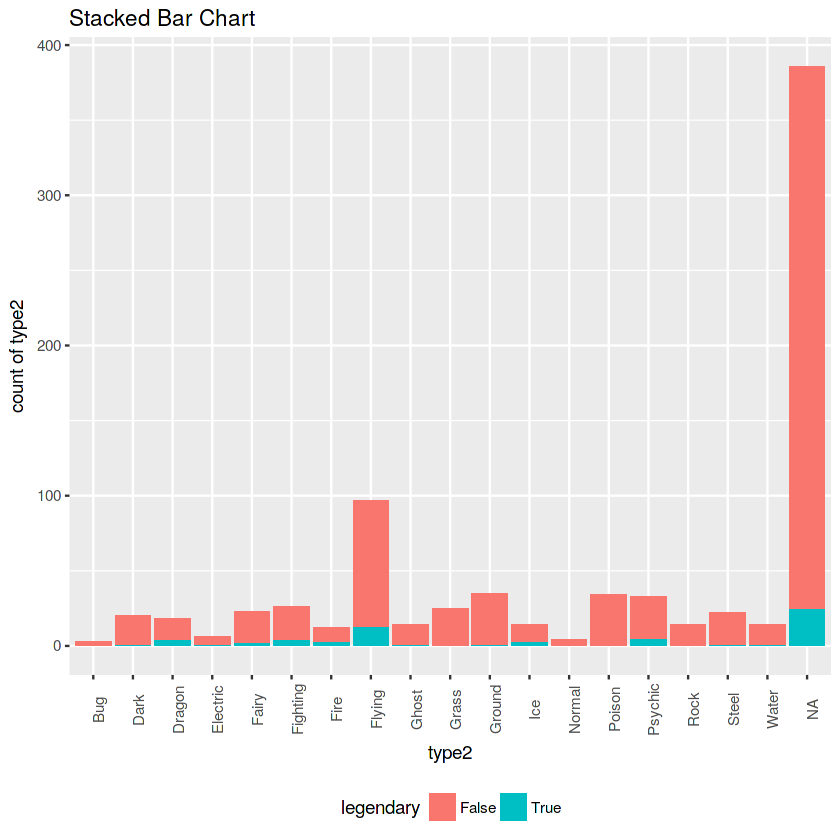

In [191]:
ggplot(pokemon, aes(type2, fill = legendary)) + geom_bar()+
         labs(title = "Stacked Bar Chart", x = "type2", y = "count of type2") + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

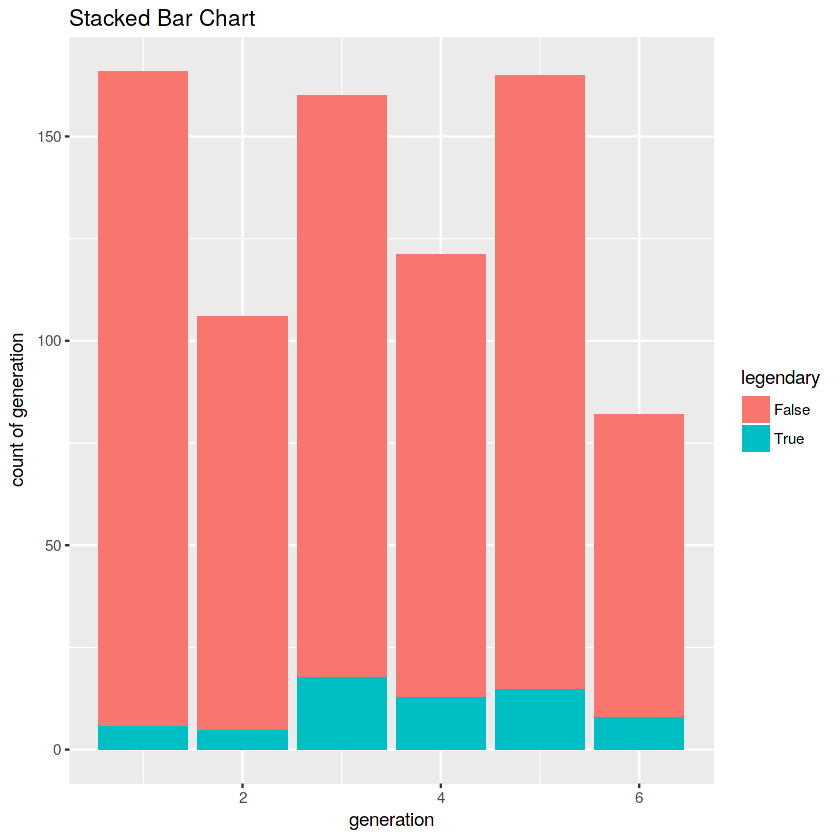

In [192]:
ggplot(pokemon, aes(generation, fill = legendary)) + geom_bar()+
         labs(title = "Stacked Bar Chart", x = "generation", y = "count of generation")

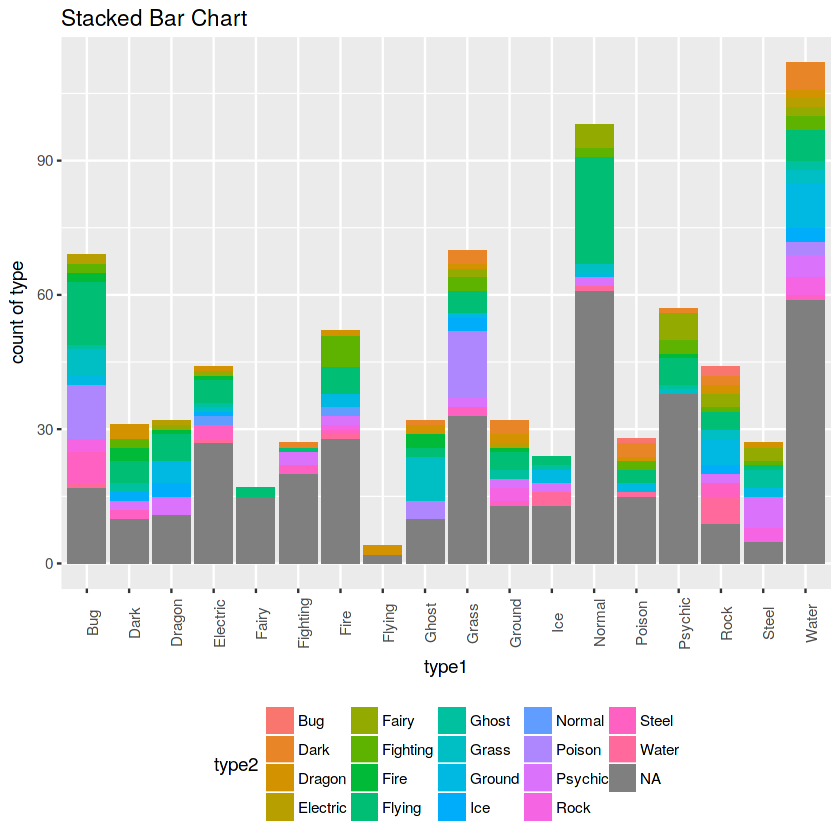

In [193]:
ggplot(pokemon, aes(type1, fill = type2)) + geom_bar()+
         labs(title = "Stacked Bar Chart", x = "type1", y = "count of type") + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

**Boxplot**

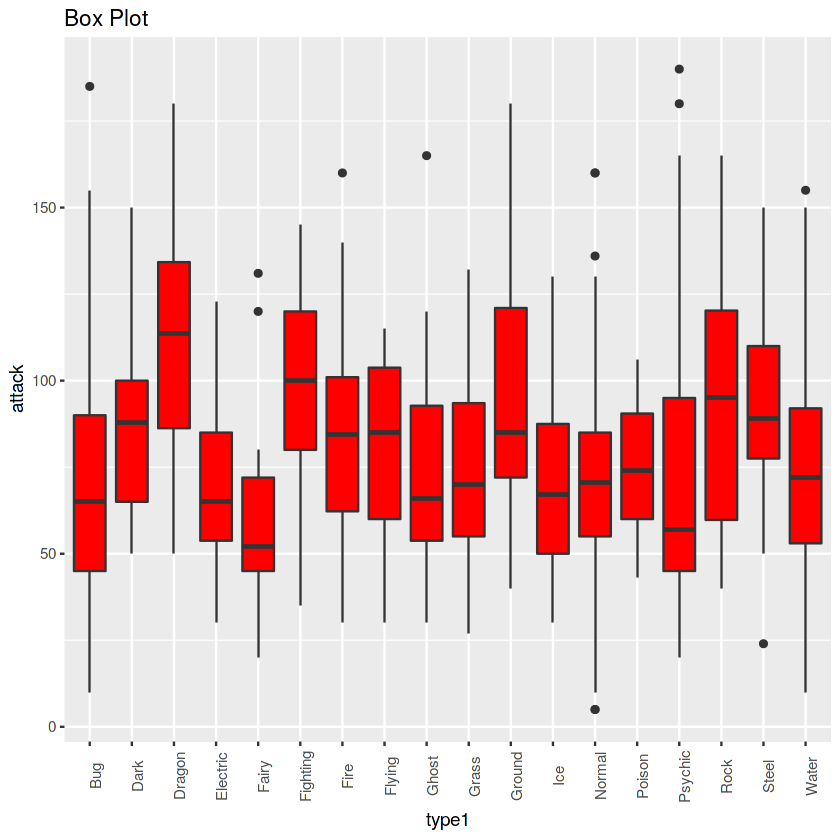

In [194]:
ggplot(pokemon, aes(type1, attack)) + geom_boxplot(fill = "red")+
                labs(title = "Box Plot", x = "type1")  + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

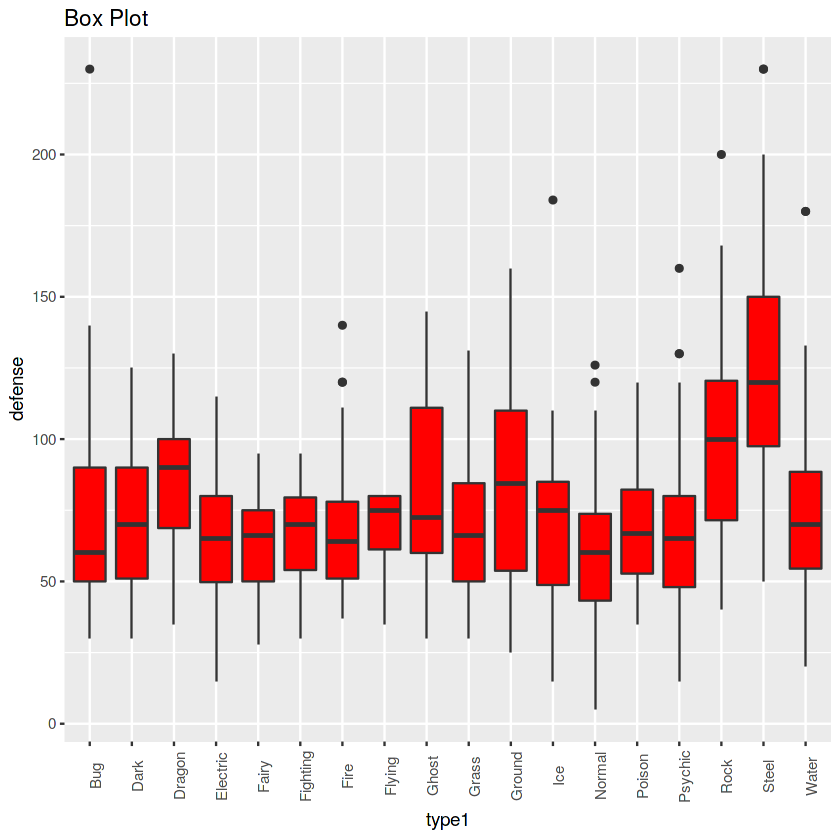

In [195]:
ggplot(pokemon, aes(type1, defense)) + geom_boxplot(fill = "red")+
                labs(title = "Box Plot", x = "type1")  + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

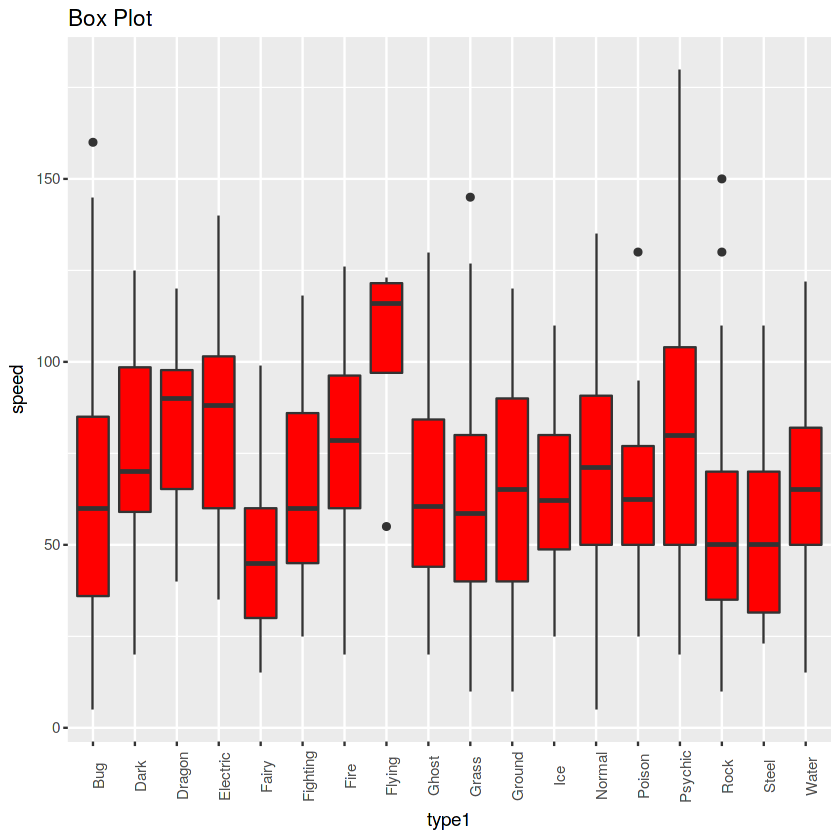

In [196]:
ggplot(pokemon, aes(type1, speed)) + geom_boxplot(fill = "red")+
                labs(title = "Box Plot", x = "type1")  + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

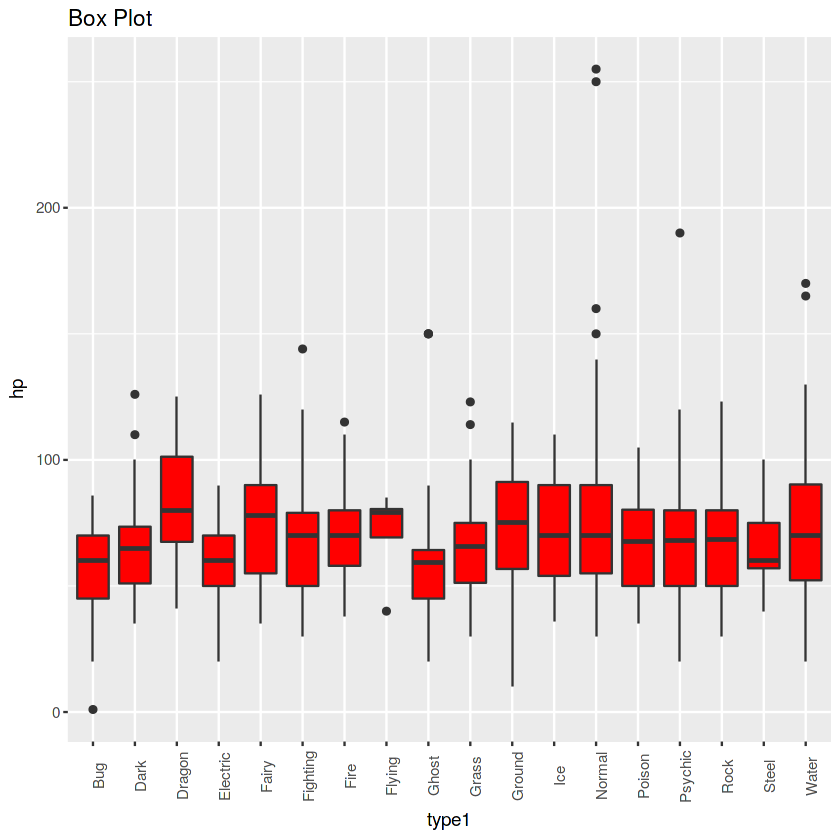

In [197]:
ggplot(pokemon, aes(type1, hp)) + geom_boxplot(fill = "red")+
                labs(title = "Box Plot", x = "type1")  + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

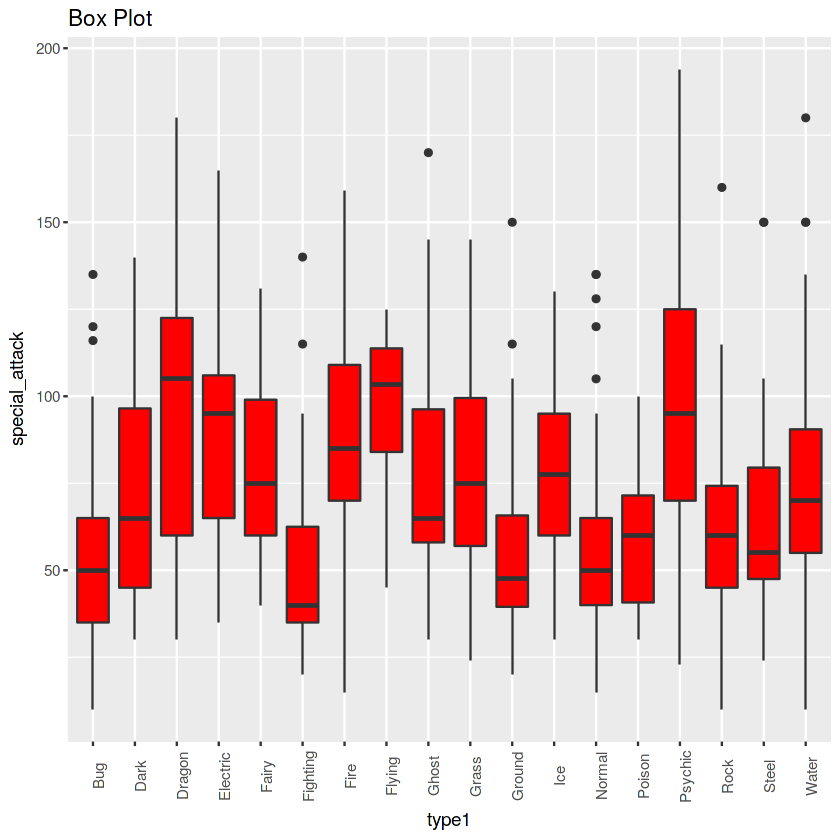

In [198]:
ggplot(pokemon, aes(type1, special_attack)) + geom_boxplot(fill = "red")+
                labs(title = "Box Plot", x = "type1")  + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

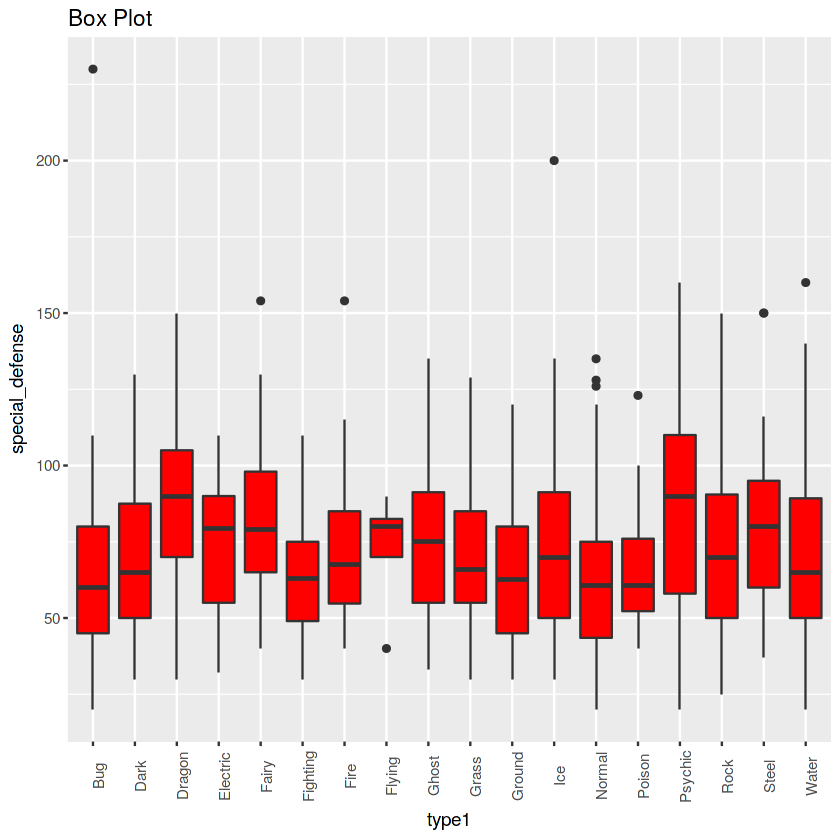

In [199]:
ggplot(pokemon, aes(type1, special_defense)) + geom_boxplot(fill = "red")+
                labs(title = "Box Plot", x = "type1")  + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

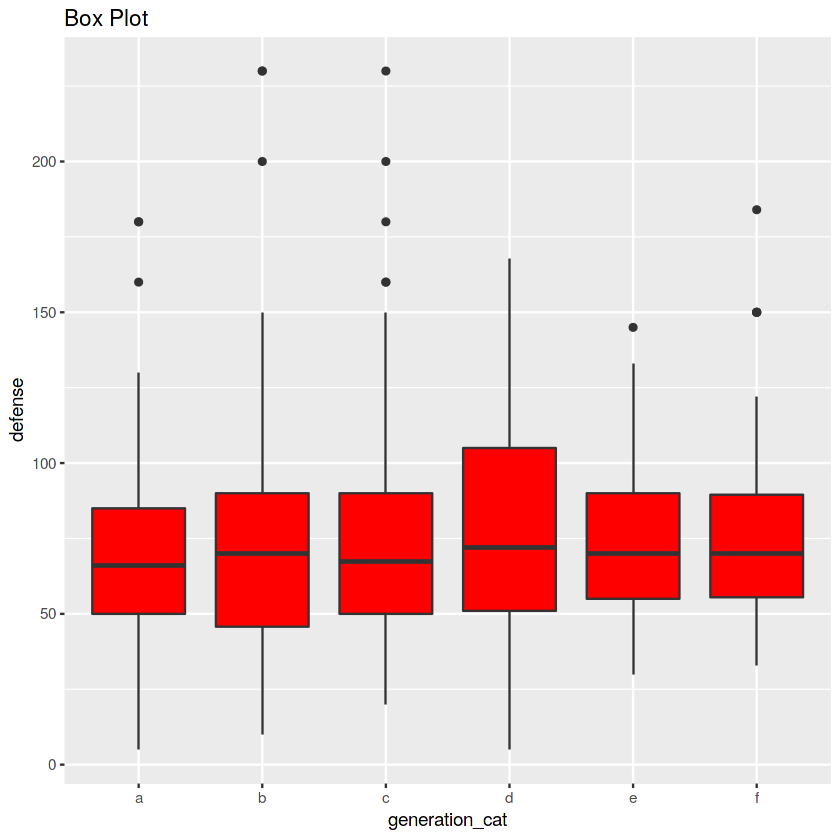

In [200]:
ggplot(pokemon, aes(generation_cat, defense)) + geom_boxplot(fill = "red")+
                labs(title = "Box Plot", x = "generation_cat") 

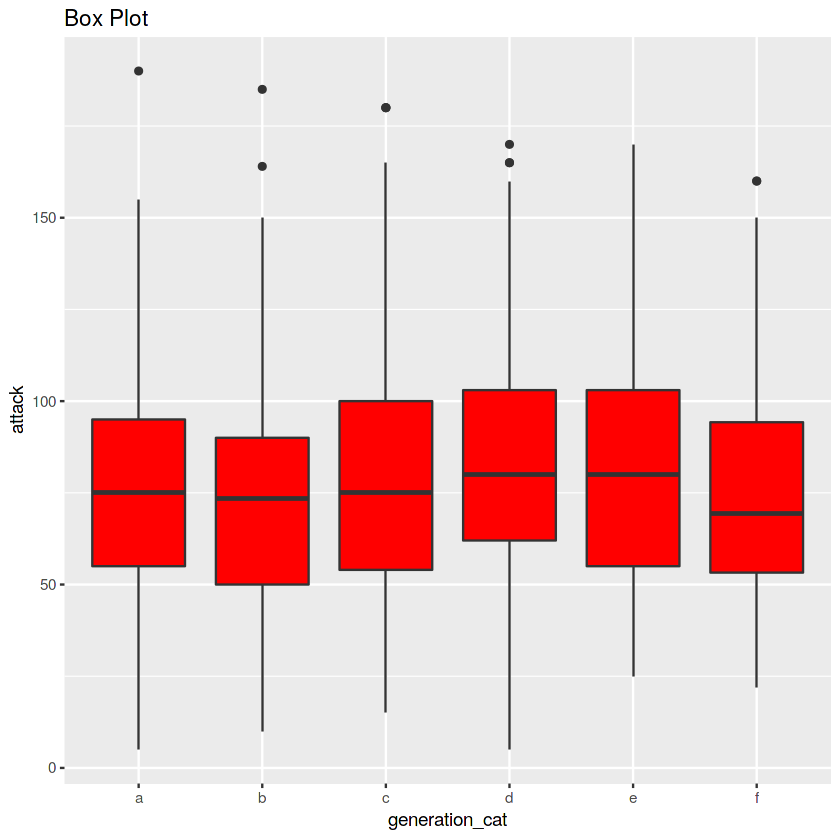

In [201]:
ggplot(pokemon, aes(generation_cat, attack)) + geom_boxplot(fill = "red")+
                labs(title = "Box Plot", x = "generation_cat") 

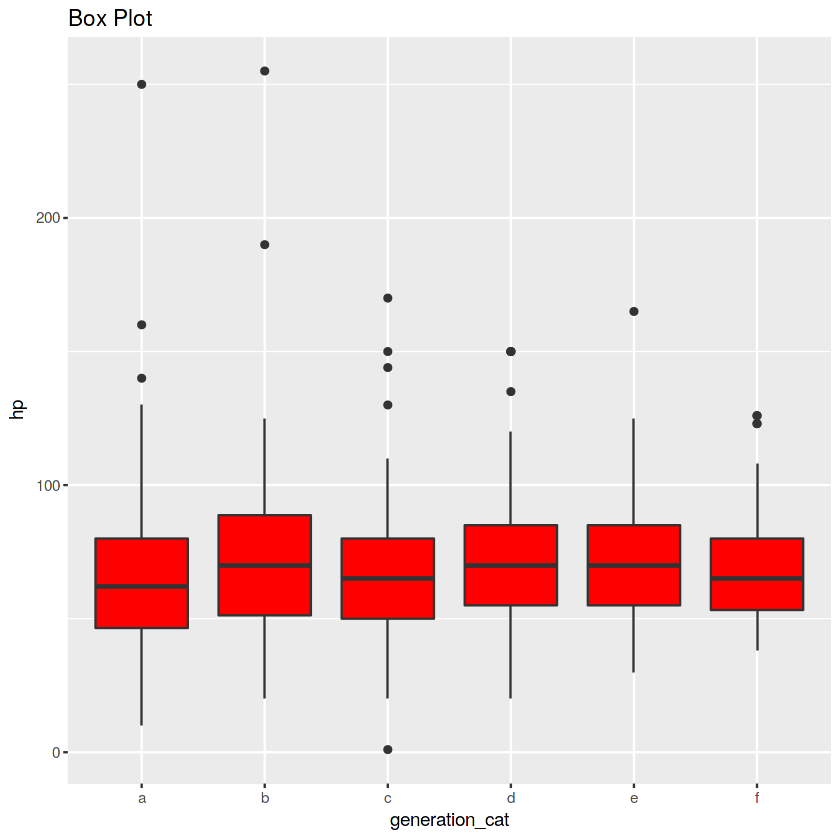

In [202]:
ggplot(pokemon, aes(generation_cat, hp)) + geom_boxplot(fill = "red")+
                labs(title = "Box Plot", x = "generation_cat") 

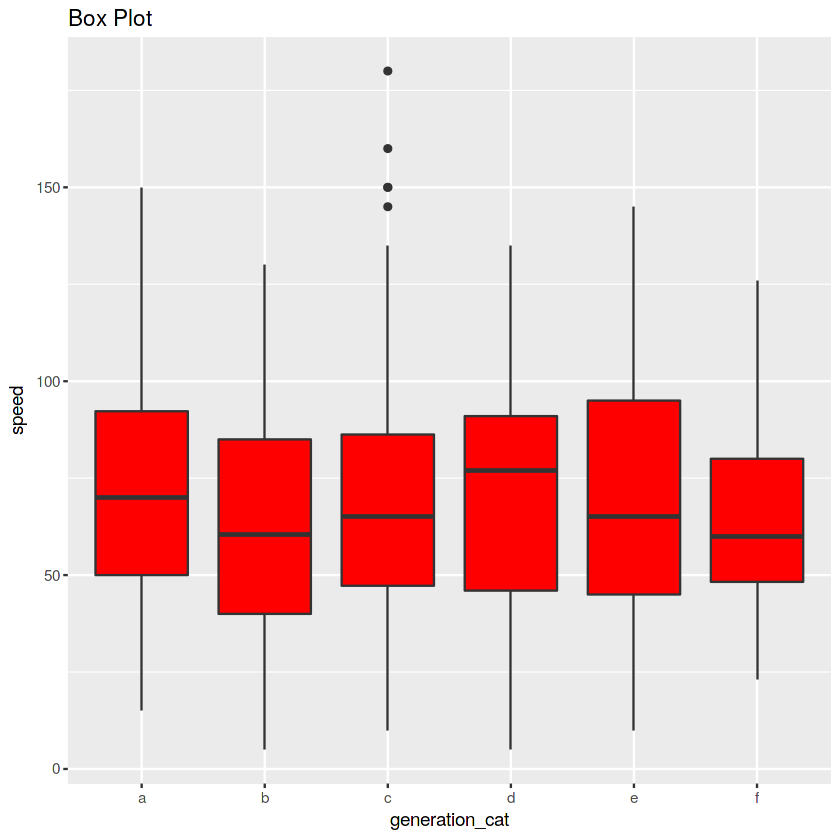

In [203]:
ggplot(pokemon, aes(generation_cat, speed)) + geom_boxplot(fill = "red")+
                labs(title = "Box Plot", x = "generation_cat") 

**Heat map**

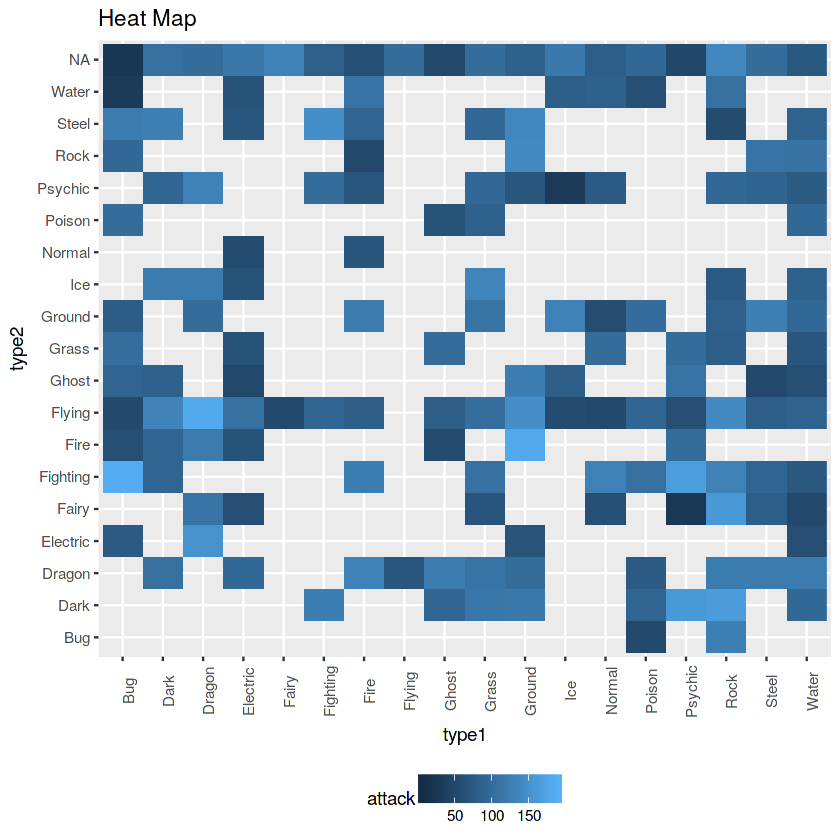

In [204]:
ggplot(pokemon, aes(type1, type2))+
               geom_raster(aes(fill = attack))+
               labs(title ="Heat Map", x = "type1", y = "type2")+
               scale_fill_continuous(name = "attack") + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

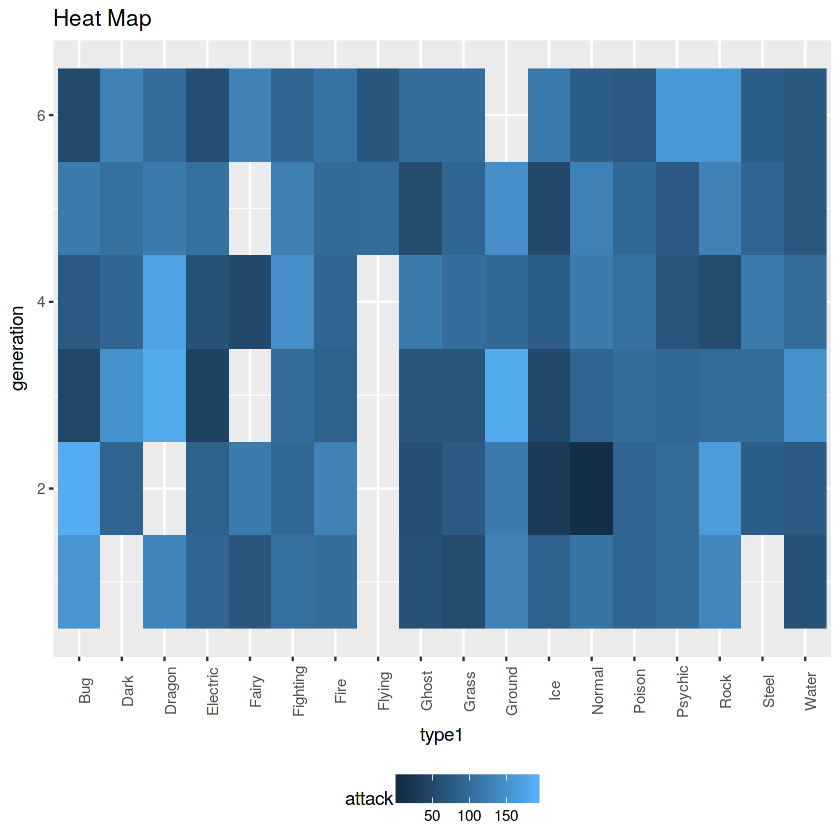

In [205]:
ggplot(pokemon, aes(type1, generation))+
               geom_raster(aes(fill = attack))+
               labs(title ="Heat Map", x = "type1", y = "generation")+
               scale_fill_continuous(name = "attack") + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

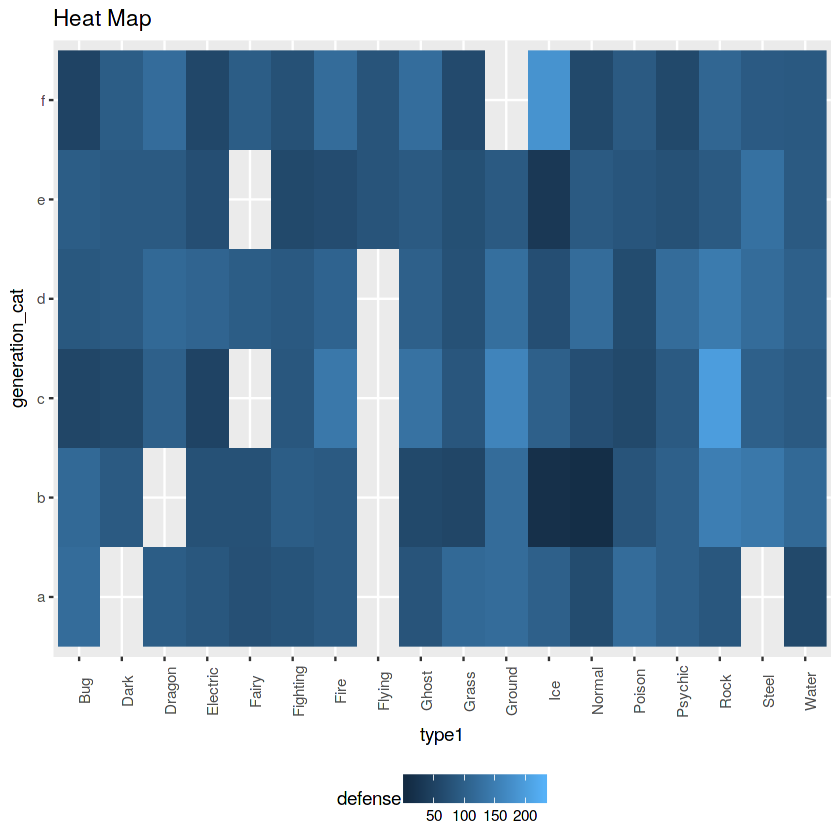

In [206]:
ggplot(pokemon, aes(type1, generation_cat))+
               geom_raster(aes(fill = defense))+
               labs(title ="Heat Map", x = "type1", y = "generation_cat")+
               scale_fill_continuous(name = "defense") + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

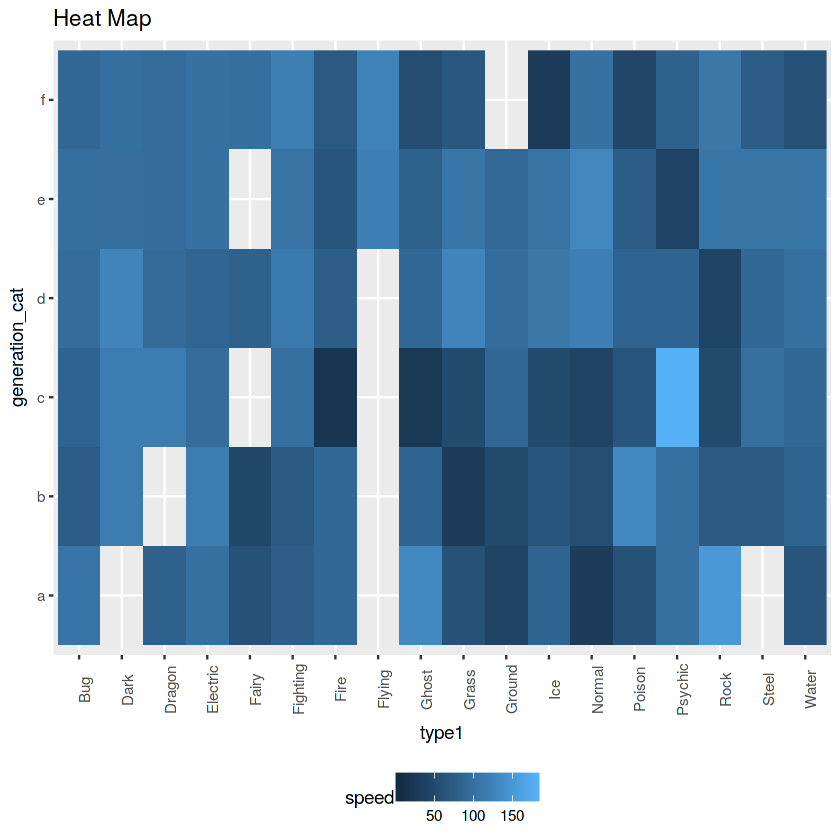

In [207]:
ggplot(pokemon, aes(type1, generation_cat))+
               geom_raster(aes(fill = speed))+
               labs(title ="Heat Map", x = "type1", y = "generation_cat")+
               scale_fill_continuous(name = "speed") + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

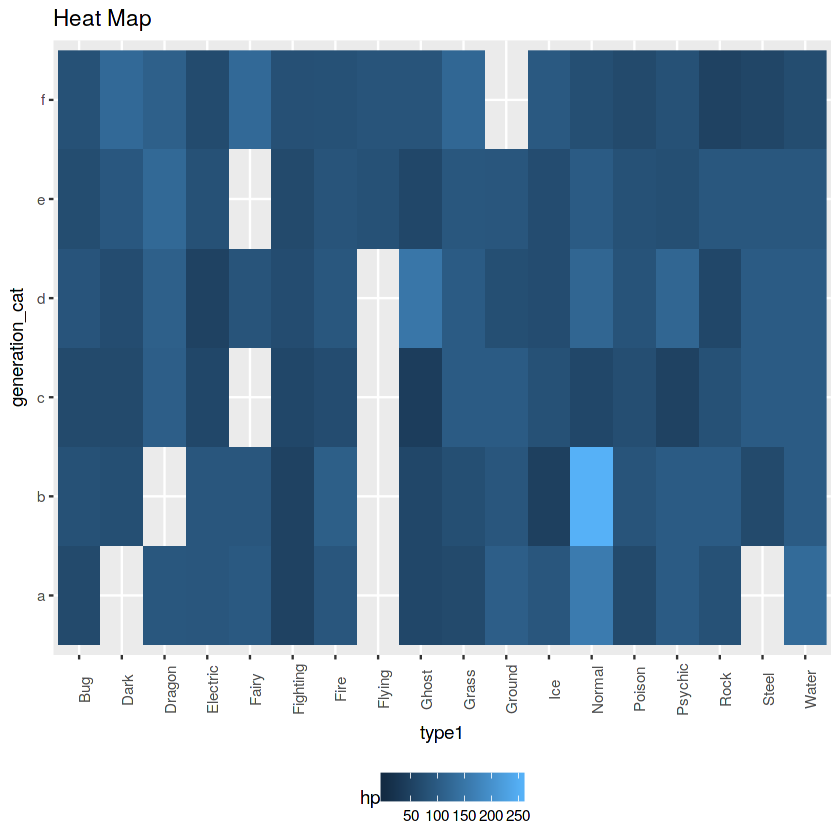

In [208]:
ggplot(pokemon, aes(type1, generation_cat))+
               geom_raster(aes(fill = hp))+
               labs(title ="Heat Map", x = "type1", y = "generation_cat")+
               scale_fill_continuous(name = "hp") + theme(legend.position="bottom",
                                axis.text.x = element_text(angle=90))

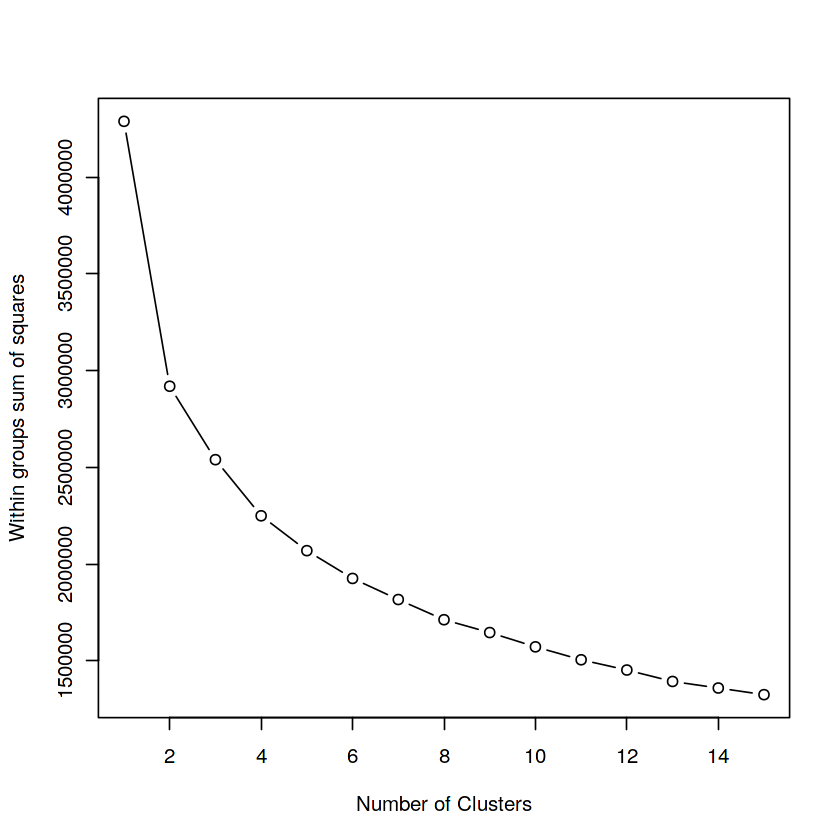

In [209]:
pok <- pokemon[,6:11]

# Initialize total within sum of squares error: wss
wss <- 0

# Look over 1 to 15 possible clusters
for (i in 1:15) {
  # Fit the model: km.out
  km.out <- kmeans(pok, centers = i, nstart = 20, iter.max = 50)
  # Save the within cluster sum of squares
  wss[i] <- km.out$tot.withinss
}

# Produce a scree plot
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

In [210]:
# Select number of clusters (2, 3, 4 probably OK)
k <- 3

# Build model with k clusters: km.out
km.out <- kmeans(pok, centers = k, nstart = 20, iter.max = 50)

# View the resulting model
km.out



K-means clustering with 3 clusters of sizes 175, 270, 355

Cluster means:
        hp   attack   defense special_attack special_defense    speed
1 79.30857 97.29714 108.93143       66.71429        87.04571 57.29143
2 81.90370 96.15926  77.65556      104.12222        86.87778 94.71111
3 54.68732 56.93239  53.64507       52.02254        53.04789 53.58873

Clustering vector:
  [1] 3 3 2 2 3 3 2 2 2 3 3 1 2 3 3 3 3 3 3 2 3 3 2 2 3 3 3 2 3 2 3 2 3 1 3 3 1
 [38] 3 3 2 3 2 3 2 3 3 3 2 3 3 2 3 1 3 2 3 3 3 2 3 2 3 2 3 2 3 3 1 3 2 2 2 3 1
 [75] 1 3 3 2 3 2 3 1 1 3 2 3 1 1 3 2 3 3 2 3 1 3 1 3 1 3 2 2 2 1 3 1 3 1 3 2 3
[112] 2 3 1 1 1 3 3 1 3 1 3 1 1 1 3 2 3 1 3 2 2 2 2 2 2 1 1 1 3 1 1 1 3 3 2 2 2
[149] 3 3 1 3 1 2 2 1 2 2 2 3 3 2 2 2 2 2 3 3 1 3 3 2 3 3 1 3 3 3 2 3 3 3 3 2 3
[186] 2 3 3 3 3 3 3 2 3 3 2 2 1 3 3 1 2 3 3 2 3 3 3 3 3 1 2 1 3 1 2 3 3 2 3 1 3
[223] 1 1 1 3 1 3 1 1 1 1 1 3 3 1 3 1 3 1 3 3 2 3 2 1 3 2 2 2 3 1 2 2 3 3 1 3 3
[260] 3 1 2 2 2 1 3 3 1 1 2 2 2 3 3 2 2 3 3 2 2 3 3 1 1 3 3 3 3 3 

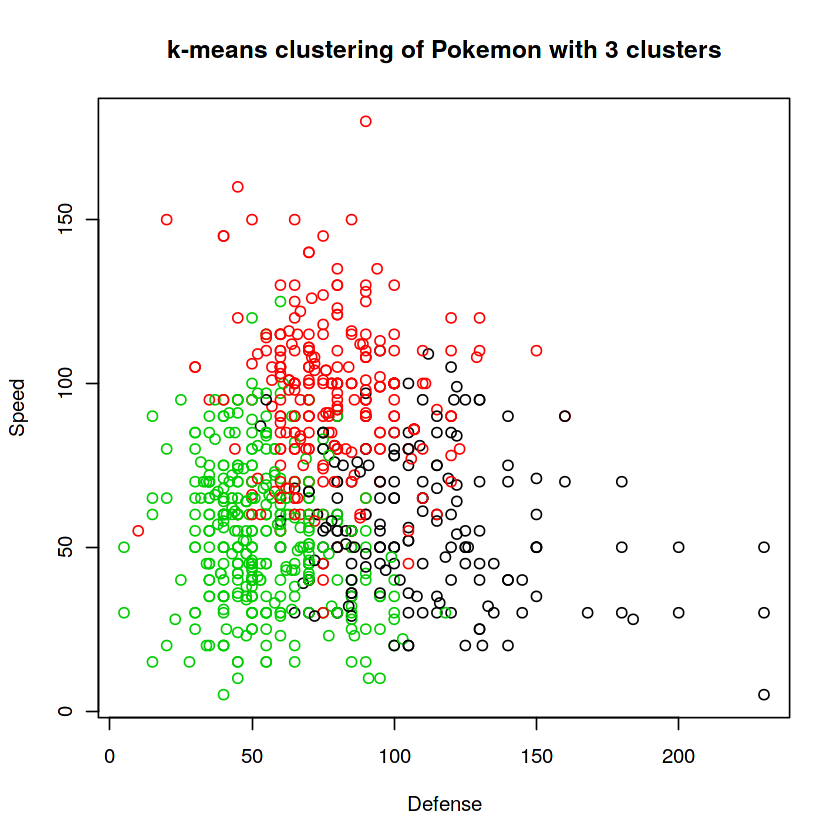

In [211]:
# Plot of Defense vs. Speed by cluster membership
plot(pok[, c("defense", "speed")],
     col = km.out$cluster,
     main = paste("k-means clustering of Pokemon with", k, "clusters"),
     xlab = "Defense", ylab = "Speed")

In [212]:
# View column means
colMeans(pok)

# View column standard deviations
apply(pok, 2, sd)

# Scale the data
pokemon.scaled <- scale(pok)

# Create hierarchical clustering model: hclust.pokemon
hclust.pokemon <- hclust(dist(pokemon.scaled), method = "complete")

hp          attack         defense  special_attack special_defense 
       69.25875        79.00125        73.84250        72.82000        71.90250 
          speed 
       68.27750

hp          attack         defense  special_attack special_defense 
       25.53467        32.45737        31.18350        32.72229        27.82892 
          speed 
       29.06047

In [213]:
# Apply cutree() to hclust.pokemon: cut.pokemon
cut.pokemon <- cutree(hclust.pokemon, k = 3)

# Compare methods
table(km.out$cluster, cut.pokemon)

   cut.pokemon
      1   2   3
  1 171   3   1
  2 267   3   0
  3 350   5   0

***Looking at the table, it looks like the hierarchical clustering model assigns most of the observations to cluster 1, while the k-means algorithm distributes the observations relatively evenly among all clusters.***

In [214]:
# Perform scaled PCA: pr.out
pr.out <- prcomp(pok, scale = TRUE)

# Inspect model output
summary(pr.out)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6
Standard deviation     1.6466 1.0457 0.8825 0.8489 0.65463 0.51681
Proportion of Variance 0.4519 0.1822 0.1298 0.1201 0.07142 0.04451
Cumulative Proportion  0.4519 0.6342 0.7640 0.8841 0.95549 1.00000

In [215]:
# Variability of each principal component: pr.var
pr.var <- pr.out$sdev^2

# Variance explained by each principal component: pve
pve <- pr.var / sum(pr.var)

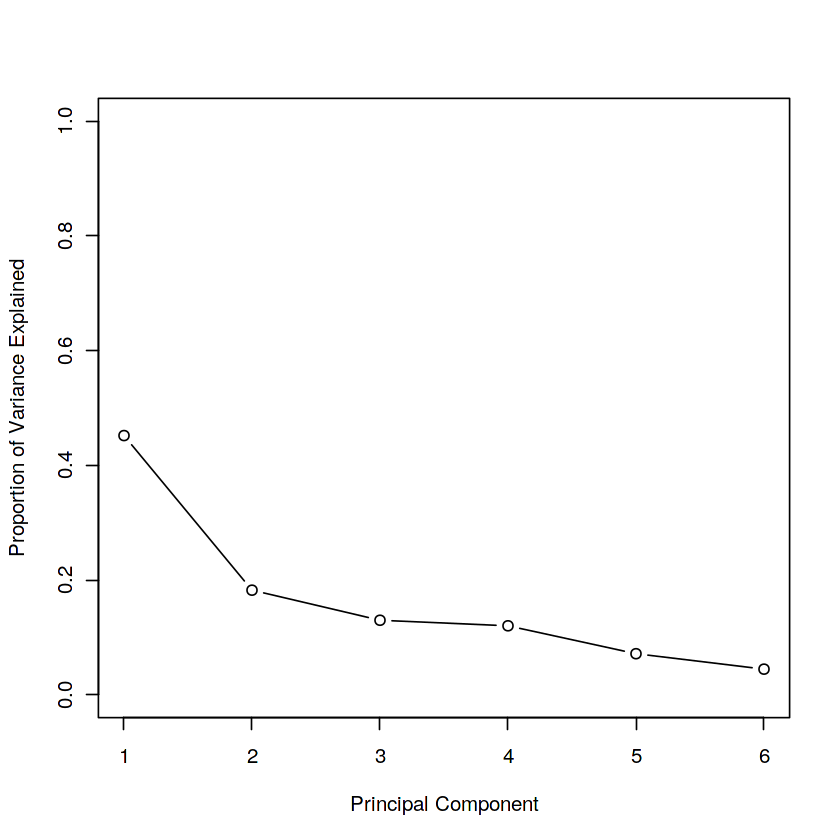

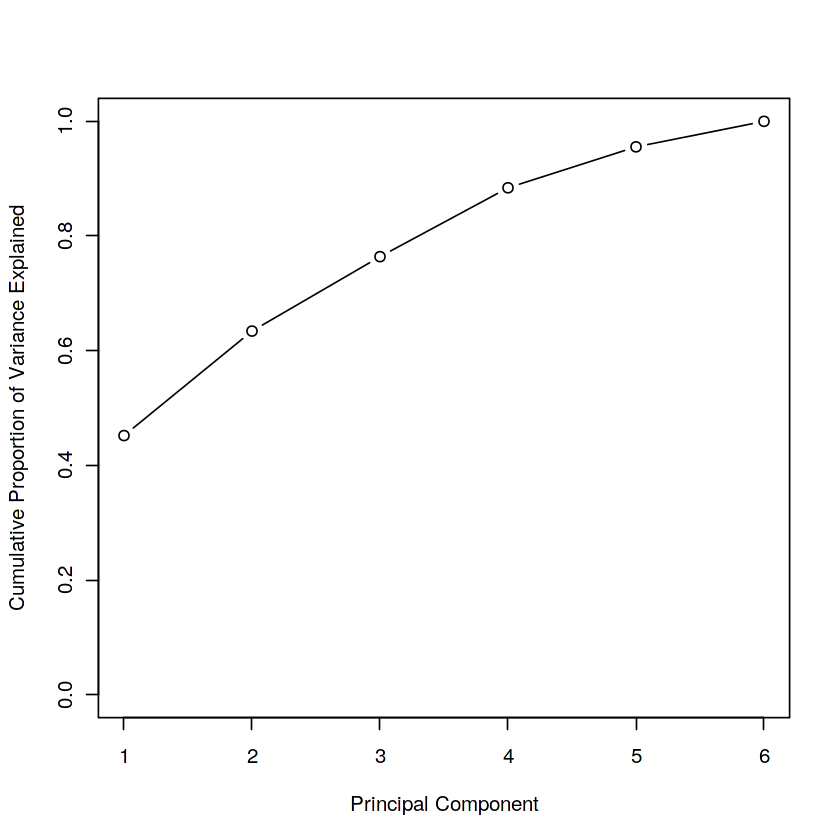

In [216]:
# Plot variance explained for each principal component
plot(pve, xlab = "Principal Component",
     ylab = "Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

***Notice that when the number of principal components is equal to the number of original features in the data, the cumulative proportion of variance explained is 1. ***

In [217]:
# Mean of each variable
colMeans(pok)

# Standard deviation of each variable
apply(pok, 2, sd)

# PCA model with scaling: pr.with.scaling
pr.with.scaling <- prcomp(pok, scale = TRUE)

# PCA model without scaling: pr.without.scaling
pr.without.scaling <- prcomp(pok, scale = FALSE)



hp          attack         defense  special_attack special_defense 
       69.25875        79.00125        73.84250        72.82000        71.90250 
          speed 
       68.27750

hp          attack         defense  special_attack special_defense 
       25.53467        32.45737        31.18350        32.72229        27.82892 
          speed 
       29.06047

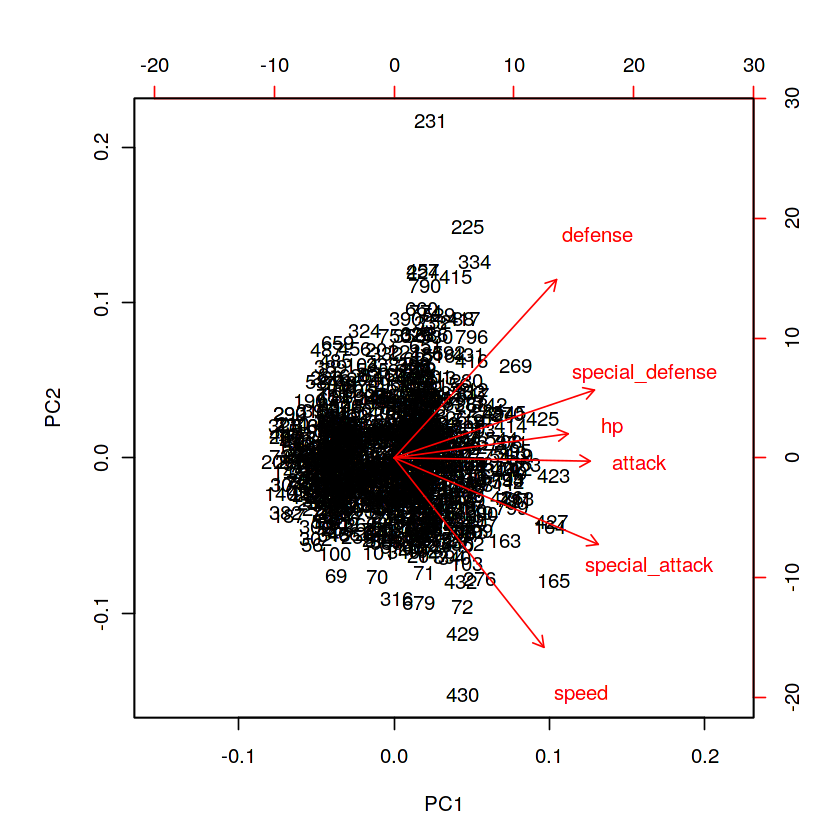

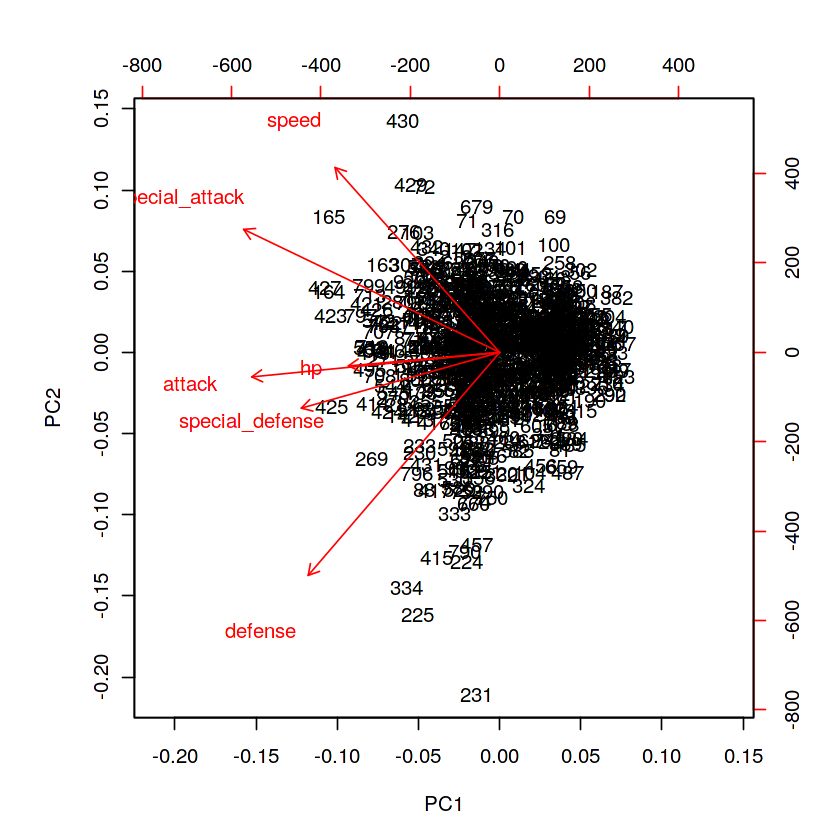

In [218]:
# Create biplots of both for comparison
biplot(pr.with.scaling)
biplot(pr.without.scaling)